<a href="https://colab.research.google.com/github/Tony607/object_detection_demo/blob/master/tensorflow_object_detection_training_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [1]:
#%tensorflow_version 1.x
!nvidia-smi
!python3 -c 'import tensorflow as tf; print(tf.__version__)'

# If you forked the repository, you can replace the link.
repo_url = 'https://github.com/hankersyan/object_detection_demo'

# Number of training steps.
num_steps = 200000 # 200000 1000

# Number of evaluation steps.
num_eval_steps = 400 # 400 20

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    },
    'ssd_mobilenet_v2_320x320': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'pipeline_file': 'ssd_mobilenet_v2_320x320_coco17_tpu-8.config',
        'batch_size': 12
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

Fri Sep  4 08:54:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0    37W /  N/A |    301MiB /  8119MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Clone the `object_detection_demo` repository or your fork.

In [2]:
import os

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

#!git clone {repo_url}
%cd {repo_dir_path}
#!git pull

/content
/content/object_detection_demo


## Install required packages

In [3]:
%cd /content
#!git clone --quiet https://github.com/tensorflow/models.git

#!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

#!pip install -q Cython contextlib2 pillow lxml matplotlib

#!pip install -q pycocotools tf_slim scipy pandas

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] = ':/content/models/research/:/content/models/research/slim/:/content/models'

!python3 object_detection/builders/model_builder_test.py

/content
/content/models/research


## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [4]:
%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python3 xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python3 xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python3 generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python3 generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/object_detection_demo
Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


W0904 08:54:23.533689 140400863442752 module_wrapper.py:139] From generate_tfrecord.py:108: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0904 08:54:23.607143 140400863442752 module_wrapper.py:139] From generate_tfrecord.py:54: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo/data/annotations/train.record


W0904 08:54:25.477380 140152860477248 module_wrapper.py:139] From generate_tfrecord.py:108: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0904 08:54:25.486138 140152860477248 module_wrapper.py:139] From generate_tfrecord.py:54: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /conte

In [5]:
test_record_fname = '/content/object_detection_demo/data/annotations/test.record'
train_record_fname = '/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = '/content/object_detection_demo/data/annotations/label_map.pbtxt'

## Download base model

In [6]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

#if not (os.path.exists(MODEL_FILE)):
#    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#tar = tarfile.open(MODEL_FILE)
#tar.extractall()
#tar.close()

#os.remove(MODEL_FILE)
#if (os.path.exists(DEST_DIR)):
#    shutil.rmtree(DEST_DIR)
#os.rename(MODEL, DEST_DIR)

/content/models/research


In [7]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxrwxrwx  3 yan yan 4.0K 8月  29 15:23 .
drwxr-xr-x 26 yan yan 4.0K 9月   4 08:52 ..
-rwxrwxrwx  1 yan yan   77 3月  30  2018 checkpoint
-rwxrwxrwx  1 yan yan  67M 3月  30  2018 frozen_inference_graph.pb
-rwxrwxrwx  1 yan yan  65M 3月  30  2018 model.ckpt.data-00000-of-00001
-rwxrwxrwx  1 yan yan  15K 3月  30  2018 model.ckpt.index
-rwxrwxrwx  1 yan yan 3.4M 3月  30  2018 model.ckpt.meta
-rwxrwxrwx  1 yan yan 4.2K 3月  30  2018 pipeline.config
drwxrwxrwx  3 yan yan 4.0K 8月  29 15:23 saved_model


In [8]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [9]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [10]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [11]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [12]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 4
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

In [13]:
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

## Run Tensorboard(Optional)

In [14]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip -o ngrok-stable-linux-amd64.zip

In [15]:
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [16]:
get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [17]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

/bin/sh: 1: curl: not found
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


## Train the model

In [18]:
!python3 /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0904 08:54:29.967010 140549049554752 model_lib.py:771] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 200000
I0904 08:54:29.967163 140549049554752 config_util.py:552] Maybe overwriting train_steps: 200000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0904 08:54:29.967228 140549049554752 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0904 08:54:29.967281 140549049554752 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0904 08:54:29.967347 140549049554752 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0904 08:54:29.967418 140549049554752 model_lib.py:787] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
W0904 08:54:44.220177 140549049554752 api.py:332] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:1004: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.
W0904 08:54:47.071712 140549049554752 deprecation.py:323] From /content/models/research/object_detection/inputs.py:259: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Calling model_fn.
I0904 08:54:49.920531 140549049554752 estimator.py:1148] Calling model_fn.
Instructions for updating:
Please use `layer.__call__` method instead.
W0904 

INFO:tensorflow:Running local_init_op.
I0904 08:55:06.627448 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 08:55:06.938660 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into training/model.ckpt.
I0904 08:55:14.111232 140549049554752 basic_session_run_hooks.py:606] Saving checkpoints for 0 into training/model.ckpt.
2020-09-04 08:55:21.448141: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-09-04 08:55:22.071923: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
INFO:tensorflow:loss = 25.439949, step = 0
I0904 08:55:23.227705 140549049554752 basic_session_run_hooks.py:262] loss = 25.439949, step = 0
INFO:tensorflow:global_step/sec: 4.60212
I0904 08:55:44.956213 140549049554752 basic_session_run_hooks.py:692] global_step/sec

INFO:tensorflow:global_step/sec: 5.3877
I0904 09:03:08.037282 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.3877
INFO:tensorflow:loss = 7.4016576, step = 2500 (18.561 sec)
I0904 09:03:08.038093 140549049554752 basic_session_run_hooks.py:260] loss = 7.4016576, step = 2500 (18.561 sec)
INFO:tensorflow:global_step/sec: 5.42671
I0904 09:03:26.464658 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42671
INFO:tensorflow:loss = 6.562016, step = 2600 (18.427 sec)
I0904 09:03:26.465394 140549049554752 basic_session_run_hooks.py:260] loss = 6.562016, step = 2600 (18.427 sec)
INFO:tensorflow:global_step/sec: 5.41735
I0904 09:03:44.923854 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41735
INFO:tensorflow:loss = 6.7396646, step = 2700 (18.459 sec)
I0904 09:03:44.924716 140549049554752 basic_session_run_hooks.py:260] loss = 6.7396646, step = 2700 (18.459 sec)
INFO:tensorflow:global_step/sec: 5.43532
I0904 09:04:03.322027 140549049554752 b

INFO:tensorflow:Running local_init_op.
I0904 09:05:21.928248 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:05:22.040350 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:05:24.121935 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:05:24.124453 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:05:24.125483 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42061
I0904 09:10:03.207891 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42061
INFO:tensorflow:loss = 4.7963796, step = 4700 (18.448 sec)
I0904 09:10:03.208817 140549049554752 basic_session_run_hooks.py:260] loss = 4.7963796, step = 4700 (18.448 sec)
INFO:tensorflow:global_step/sec: 5.4232
I0904 09:10:21.647201 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4232
INFO:tensorflow:loss = 5.282125, step = 4800 (18.439 sec)
I0904 09:10:21.648138 140549049554752 basic_session_run_hooks.py:260] loss = 5.282125, step = 4800 (18.439 sec)
INFO:tensorflow:global_step/sec: 5.39191
I0904 09:10:40.193504 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39191
INFO:tensorflow:loss = 6.0712814, step = 4900 (18.546 sec)
I0904 09:10:40.194079 140549049554752 basic_session_run_hooks.py:260] loss = 6.0712814, step = 4900 (18.546 sec)
INFO:tensorflow:global_step/sec: 5.40263
I0904 09:10:58.703052 140549049554752 b

INFO:tensorflow:Running local_init_op.
I0904 09:15:21.953984 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:15:22.063019 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:15:23.810473 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:15:23.811006 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:15:23.811587 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40111
I0904 09:20:03.219733 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40111
INFO:tensorflow:loss = 5.2747006, step = 7900 (18.515 sec)
I0904 09:20:03.220457 140549049554752 basic_session_run_hooks.py:260] loss = 5.2747006, step = 7900 (18.515 sec)
INFO:tensorflow:global_step/sec: 5.42424
I0904 09:20:21.655511 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42424
INFO:tensorflow:loss = 5.3843, step = 8000 (18.436 sec)
I0904 09:20:21.656356 140549049554752 basic_session_run_hooks.py:260] loss = 5.3843, step = 8000 (18.436 sec)
INFO:tensorflow:global_step/sec: 5.41193
I0904 09:20:40.133167 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41193
INFO:tensorflow:loss = 5.249799, step = 8100 (18.477 sec)
I0904 09:20:40.133735 140549049554752 basic_session_run_hooks.py:260] loss = 5.249799, step = 8100 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.39859
I0904 09:20:58.656524 140549049554752 basic

INFO:tensorflow:Running local_init_op.
I0904 09:25:22.383952 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:25:22.502889 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:25:24.297601 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:25:24.299243 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:25:24.300290 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40002
I0904 09:30:03.715481 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40002
INFO:tensorflow:loss = 4.550976, step = 11100 (18.519 sec)
I0904 09:30:03.716220 140549049554752 basic_session_run_hooks.py:260] loss = 4.550976, step = 11100 (18.519 sec)
INFO:tensorflow:global_step/sec: 5.35842
I0904 09:30:22.377658 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.35842
INFO:tensorflow:loss = 3.889557, step = 11200 (18.662 sec)
I0904 09:30:22.378241 140549049554752 basic_session_run_hooks.py:260] loss = 3.889557, step = 11200 (18.662 sec)
INFO:tensorflow:global_step/sec: 5.42857
I0904 09:30:40.798737 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42857
INFO:tensorflow:loss = 4.0819783, step = 11300 (18.422 sec)
I0904 09:30:40.799842 140549049554752 basic_session_run_hooks.py:260] loss = 4.0819783, step = 11300 (18.422 sec)
INFO:tensorflow:global_step/sec: 5.41059
I0904 09:30:59.281012 14054904955

INFO:tensorflow:Running local_init_op.
I0904 09:35:22.298265 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:35:22.413651 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:35:24.212512 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:35:24.212844 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:35:24.214032 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.4074
I0904 09:39:45.266030 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4074
INFO:tensorflow:loss = 3.8986745, step = 14200 (18.493 sec)
I0904 09:39:45.266839 140549049554752 basic_session_run_hooks.py:260] loss = 3.8986745, step = 14200 (18.493 sec)
INFO:tensorflow:global_step/sec: 5.37001
I0904 09:40:03.887958 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37001
INFO:tensorflow:loss = 5.1965337, step = 14300 (18.622 sec)
I0904 09:40:03.888684 140549049554752 basic_session_run_hooks.py:260] loss = 5.1965337, step = 14300 (18.622 sec)
INFO:tensorflow:global_step/sec: 5.4006
I0904 09:40:22.404430 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4006
INFO:tensorflow:loss = 3.677502, step = 14400 (18.517 sec)
I0904 09:40:22.405277 140549049554752 basic_session_run_hooks.py:260] loss = 3.677502, step = 14400 (18.517 sec)
INFO:tensorflow:global_step/sec: 5.40065
I0904 09:40:40.920703 1405490495547

INFO:tensorflow:Running local_init_op.
I0904 09:45:22.312310 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:45:22.424005 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:45:24.215037 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:45:24.215615 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:45:24.216432 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.38591
I0904 09:50:04.059942 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38591
INFO:tensorflow:loss = 2.990099, step = 17500 (18.567 sec)
I0904 09:50:04.060671 140549049554752 basic_session_run_hooks.py:260] loss = 2.990099, step = 17500 (18.567 sec)
INFO:tensorflow:global_step/sec: 5.39412
I0904 09:50:22.598645 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39412
INFO:tensorflow:loss = 2.7642403, step = 17600 (18.539 sec)
I0904 09:50:22.599305 140549049554752 basic_session_run_hooks.py:260] loss = 2.7642403, step = 17600 (18.539 sec)
INFO:tensorflow:global_step/sec: 5.39661
I0904 09:50:41.128815 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39661
INFO:tensorflow:loss = 3.4091203, step = 17700 (18.531 sec)
I0904 09:50:41.129875 140549049554752 basic_session_run_hooks.py:260] loss = 3.4091203, step = 17700 (18.531 sec)
INFO:tensorflow:global_step/sec: 5.42007
I0904 09:50:59.578767 140549049

INFO:tensorflow:Running local_init_op.
I0904 09:55:22.705063 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 09:55:22.816577 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 09:55:24.645386 140543219648256 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 09:55:24.645977 140543219648256 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 09:55:24.647058 140543219648256 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.129
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39829
I0904 09:59:45.898105 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39829
INFO:tensorflow:loss = 3.1701772, step = 20600 (18.524 sec)
I0904 09:59:45.898939 140549049554752 basic_session_run_hooks.py:260] loss = 3.1701772, step = 20600 (18.524 sec)
INFO:tensorflow:global_step/sec: 5.39898
I0904 10:00:04.420117 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39898
INFO:tensorflow:loss = 4.1510105, step = 20700 (18.522 sec)
I0904 10:00:04.421118 140549049554752 basic_session_run_hooks.py:260] loss = 4.1510105, step = 20700 (18.522 sec)
INFO:tensorflow:global_step/sec: 5.40407
I0904 10:00:22.924714 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40407
INFO:tensorflow:loss = 3.3953621, step = 20800 (18.504 sec)
I0904 10:00:22.925545 140549049554752 basic_session_run_hooks.py:260] loss = 3.3953621, step = 20800 (18.504 sec)
INFO:tensorflow:global_step/sec: 5.388
I0904 10:00:41.484456 140549049

INFO:tensorflow:Running local_init_op.
I0904 10:05:22.692570 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 10:05:22.804842 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 10:05:24.658328 140543219648256 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 10:05:24.658757 140543219648256 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 10:05:24.659918 140543219648256 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.41438
I0904 10:10:05.090642 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41438
INFO:tensorflow:loss = 2.8506727, step = 23900 (18.469 sec)
I0904 10:10:05.091247 140549049554752 basic_session_run_hooks.py:260] loss = 2.8506727, step = 23900 (18.469 sec)
INFO:tensorflow:global_step/sec: 5.40694
I0904 10:10:23.585391 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40694
INFO:tensorflow:loss = 3.1086032, step = 24000 (18.495 sec)
I0904 10:10:23.585939 140549049554752 basic_session_run_hooks.py:260] loss = 3.1086032, step = 24000 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.38724
I0904 10:10:42.147762 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38724
INFO:tensorflow:loss = 3.067659, step = 24100 (18.563 sec)
I0904 10:10:42.148600 140549049554752 basic_session_run_hooks.py:260] loss = 3.067659, step = 24100 (18.563 sec)
INFO:tensorflow:global_step/sec: 5.43074
I0904 10:11:00.561473 140549049

INFO:tensorflow:Running local_init_op.
I0904 10:15:22.520894 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 10:15:22.631260 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 10:15:24.491795 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 10:15:24.493824 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 10:15:24.495123 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42779
I0904 10:20:04.736257 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42779
INFO:tensorflow:loss = 3.12825, step = 27100 (18.424 sec)
I0904 10:20:04.736968 140549049554752 basic_session_run_hooks.py:260] loss = 3.12825, step = 27100 (18.424 sec)
INFO:tensorflow:global_step/sec: 5.42731
I0904 10:20:23.161578 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42731
INFO:tensorflow:loss = 4.422443, step = 27200 (18.425 sec)
I0904 10:20:23.162136 140549049554752 basic_session_run_hooks.py:260] loss = 4.422443, step = 27200 (18.425 sec)
INFO:tensorflow:global_step/sec: 5.4059
I0904 10:20:41.659923 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4059
INFO:tensorflow:loss = 3.8172014, step = 27300 (18.499 sec)
I0904 10:20:41.660680 140549049554752 basic_session_run_hooks.py:260] loss = 3.8172014, step = 27300 (18.499 sec)
INFO:tensorflow:global_step/sec: 5.3798
I0904 10:21:00.247956 140549049554752 

INFO:tensorflow:global_step/sec: 5.40871
I0904 10:28:06.559566 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40871
INFO:tensorflow:loss = 3.2445378, step = 29700 (18.489 sec)
I0904 10:28:06.560323 140549049554752 basic_session_run_hooks.py:260] loss = 3.2445378, step = 29700 (18.489 sec)
INFO:tensorflow:global_step/sec: 5.40606
I0904 10:28:25.057314 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40606
INFO:tensorflow:loss = 2.431063, step = 29800 (18.498 sec)
I0904 10:28:25.057959 140549049554752 basic_session_run_hooks.py:260] loss = 2.431063, step = 29800 (18.498 sec)
INFO:tensorflow:global_step/sec: 5.41342
I0904 10:28:43.529927 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41342
INFO:tensorflow:loss = 3.4456933, step = 29900 (18.473 sec)
I0904 10:28:43.530540 140549049554752 basic_session_run_hooks.py:260] loss = 3.4456933, step = 29900 (18.473 sec)
INFO:tensorflow:global_step/sec: 5.41984
I0904 10:29:01.980651 140549049

INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 10:35:20.438798 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 10:35:20.463181 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 10:35:20.489810 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0904 10:35:21.595174 140549049554752 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-04T10:35:21Z
I0904 10:35:21.607579 140549049554752 evaluation.py:255] Starting evaluation at 2020-09-04T10:35:21Z
INFO:tensorflow:Graph was finalized.
I0904 10:35:21.918775 140549049554752 monitored_session.py:240] Graph was finalized.
2020-09-04 10:35:21.919298: I tens

INFO:tensorflow:global_step/sec: 5.36127
I0904 10:35:58.067492 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36127
INFO:tensorflow:loss = 3.0427024, step = 32200 (18.652 sec)
I0904 10:35:58.068140 140549049554752 basic_session_run_hooks.py:260] loss = 3.0427024, step = 32200 (18.652 sec)
INFO:tensorflow:global_step/sec: 5.39158
I0904 10:36:16.614920 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39158
INFO:tensorflow:loss = 1.802557, step = 32300 (18.548 sec)
I0904 10:36:16.615695 140549049554752 basic_session_run_hooks.py:260] loss = 1.802557, step = 32300 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.40365
I0904 10:36:35.120918 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40365
INFO:tensorflow:loss = 2.4516091, step = 32400 (18.506 sec)
I0904 10:36:35.121568 140549049554752 basic_session_run_hooks.py:260] loss = 2.4516091, step = 32400 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.38972
I0904 10:36:53.674743 140549049

INFO:tensorflow:global_step/sec: 5.36515
I0904 10:44:17.680900 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36515
INFO:tensorflow:loss = 3.256208, step = 34900 (18.639 sec)
I0904 10:44:17.681589 140549049554752 basic_session_run_hooks.py:260] loss = 3.256208, step = 34900 (18.639 sec)
INFO:tensorflow:global_step/sec: 5.40946
I0904 10:44:36.167021 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40946
INFO:tensorflow:loss = 2.9830177, step = 35000 (18.486 sec)
I0904 10:44:36.167566 140549049554752 basic_session_run_hooks.py:260] loss = 2.9830177, step = 35000 (18.486 sec)
INFO:tensorflow:global_step/sec: 5.39236
I0904 10:44:54.711800 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39236
INFO:tensorflow:loss = 3.3821592, step = 35100 (18.545 sec)
I0904 10:44:54.712601 140549049554752 basic_session_run_hooks.py:260] loss = 3.3821592, step = 35100 (18.545 sec)
INFO:tensorflow:global_step/sec: 5.38699
I0904 10:45:13.275033 140549049

INFO:tensorflow:global_step/sec: 3.81019
I0904 10:45:39.520488 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 3.81019
INFO:tensorflow:loss = 3.0191975, step = 35300 (26.246 sec)
I0904 10:45:39.521236 140549049554752 basic_session_run_hooks.py:260] loss = 3.0191975, step = 35300 (26.246 sec)
INFO:tensorflow:global_step/sec: 5.40296
I0904 10:45:58.028872 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40296
INFO:tensorflow:loss = 2.2128198, step = 35400 (18.508 sec)
I0904 10:45:58.029667 140549049554752 basic_session_run_hooks.py:260] loss = 2.2128198, step = 35400 (18.508 sec)
INFO:tensorflow:global_step/sec: 5.40378
I0904 10:46:16.534439 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40378
INFO:tensorflow:loss = 3.0373158, step = 35500 (18.505 sec)
I0904 10:46:16.535131 140549049554752 basic_session_run_hooks.py:260] loss = 3.0373158, step = 35500 (18.505 sec)
INFO:tensorflow:global_step/sec: 5.38685
I0904 10:46:35.098138 1405490

INFO:tensorflow:global_step/sec: 5.36871
I0904 10:54:00.051543 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36871
INFO:tensorflow:loss = 2.6495423, step = 38000 (18.626 sec)
I0904 10:54:00.052260 140549049554752 basic_session_run_hooks.py:260] loss = 2.6495423, step = 38000 (18.626 sec)
INFO:tensorflow:global_step/sec: 5.39991
I0904 10:54:18.570389 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39991
INFO:tensorflow:loss = 2.6359248, step = 38100 (18.519 sec)
I0904 10:54:18.571088 140549049554752 basic_session_run_hooks.py:260] loss = 2.6359248, step = 38100 (18.519 sec)
INFO:tensorflow:global_step/sec: 5.43904
I0904 10:54:36.956011 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43904
INFO:tensorflow:loss = 2.8798394, step = 38200 (18.386 sec)
I0904 10:54:36.956843 140549049554752 basic_session_run_hooks.py:260] loss = 2.8798394, step = 38200 (18.386 sec)
INFO:tensorflow:global_step/sec: 5.4285
I0904 10:54:55.377282 14054904

INFO:tensorflow:Finished evaluation at 2020-09-04-10:55:24
I0904 10:55:24.939217 140549049554752 evaluation.py:275] Finished evaluation at 2020-09-04-10:55:24
INFO:tensorflow:Saving dict for global step 38418: DetectionBoxes_Precision/mAP = 0.21892133, DetectionBoxes_Precision/mAP (large) = 0.24723539, DetectionBoxes_Precision/mAP (medium) = 0.0065456545, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 0.591836, DetectionBoxes_Precision/mAP@.75IOU = 0.11066419, DetectionBoxes_Recall/AR@1 = 0.20125, DetectionBoxes_Recall/AR@10 = 0.24145833, DetectionBoxes_Recall/AR@100 = 0.37479165, DetectionBoxes_Recall/AR@100 (large) = 0.365, DetectionBoxes_Recall/AR@100 (medium) = 0.175, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 8.428862, Loss/localization_loss = 1.2783293, Loss/regularization_loss = 0.34297287, Loss/total_loss = 10.050165, global_step = 38418, learning_rate = 0.004, loss = 10.050165
I0904 10:55:24.939467 14054904955475

INFO:tensorflow:global_step/sec: 5.39474
I0904 11:01:50.802381 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39474
INFO:tensorflow:loss = 2.198649, step = 40500 (18.537 sec)
I0904 11:01:50.803103 140549049554752 basic_session_run_hooks.py:260] loss = 2.198649, step = 40500 (18.537 sec)
INFO:tensorflow:global_step/sec: 5.36821
I0904 11:02:09.430539 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36821
INFO:tensorflow:loss = 4.054692, step = 40600 (18.628 sec)
I0904 11:02:09.431152 140549049554752 basic_session_run_hooks.py:260] loss = 4.054692, step = 40600 (18.628 sec)
INFO:tensorflow:global_step/sec: 5.39885
I0904 11:02:27.953015 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39885
INFO:tensorflow:loss = 2.3958385, step = 40700 (18.523 sec)
I0904 11:02:27.954097 140549049554752 basic_session_run_hooks.py:260] loss = 2.3958385, step = 40700 (18.523 sec)
INFO:tensorflow:global_step/sec: 5.40684
I0904 11:02:46.448091 14054904955

INFO:tensorflow:Running local_init_op.
I0904 11:05:22.980283 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:05:23.096294 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:05:24.904301 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:05:24.904645 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:05:24.905205 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39752
I0904 11:10:18.588026 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39752
INFO:tensorflow:loss = 1.8956516, step = 43200 (18.527 sec)
I0904 11:10:18.588881 140549049554752 basic_session_run_hooks.py:260] loss = 1.8956516, step = 43200 (18.527 sec)
INFO:tensorflow:global_step/sec: 5.42204
I0904 11:10:37.031225 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42204
INFO:tensorflow:loss = 1.8502531, step = 43300 (18.443 sec)
I0904 11:10:37.032080 140549049554752 basic_session_run_hooks.py:260] loss = 1.8502531, step = 43300 (18.443 sec)
INFO:tensorflow:global_step/sec: 5.37837
I0904 11:10:55.624244 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37837
INFO:tensorflow:loss = 3.3221018, step = 43400 (18.593 sec)
I0904 11:10:55.624918 140549049554752 basic_session_run_hooks.py:260] loss = 3.3221018, step = 43400 (18.593 sec)
INFO:tensorflow:global_step/sec: 5.38762
I0904 11:11:14.185334 1405490

INFO:tensorflow:Running local_init_op.
I0904 11:15:22.528115 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:15:22.641282 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:15:24.476485 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:15:24.476987 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:15:24.478197 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.114
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.38957
I0904 11:20:00.123886 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38957
INFO:tensorflow:loss = 2.4195461, step = 46300 (18.554 sec)
I0904 11:20:00.124602 140549049554752 basic_session_run_hooks.py:260] loss = 2.4195461, step = 46300 (18.554 sec)
INFO:tensorflow:global_step/sec: 5.39233
I0904 11:20:18.668800 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39233
INFO:tensorflow:loss = 2.7336411, step = 46400 (18.545 sec)
I0904 11:20:18.669678 140549049554752 basic_session_run_hooks.py:260] loss = 2.7336411, step = 46400 (18.545 sec)
INFO:tensorflow:global_step/sec: 5.40369
I0904 11:20:37.174630 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40369
INFO:tensorflow:loss = 2.3972352, step = 46500 (18.506 sec)
I0904 11:20:37.175338 140549049554752 basic_session_run_hooks.py:260] loss = 2.3972352, step = 46500 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.39881
I0904 11:20:55.697229 1405490

INFO:tensorflow:Running local_init_op.
I0904 11:25:23.173725 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:25:23.286405 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:25:25.137116 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:25:25.137440 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:25:25.138209 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.43303
I0904 11:30:19.064541 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43303
INFO:tensorflow:loss = 3.0417638, step = 49600 (18.406 sec)
I0904 11:30:19.065256 140549049554752 basic_session_run_hooks.py:260] loss = 3.0417638, step = 49600 (18.406 sec)
INFO:tensorflow:global_step/sec: 5.388
I0904 11:30:37.624253 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.388
INFO:tensorflow:loss = 1.3507314, step = 49700 (18.560 sec)
I0904 11:30:37.625255 140549049554752 basic_session_run_hooks.py:260] loss = 1.3507314, step = 49700 (18.560 sec)
INFO:tensorflow:global_step/sec: 5.42367
I0904 11:30:56.061943 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42367
INFO:tensorflow:loss = 2.0551255, step = 49800 (18.438 sec)
I0904 11:30:56.062896 140549049554752 basic_session_run_hooks.py:260] loss = 2.0551255, step = 49800 (18.438 sec)
INFO:tensorflow:global_step/sec: 5.3933
I0904 11:31:14.603477 140549049554

INFO:tensorflow:Running local_init_op.
I0904 11:35:22.877341 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:35:22.987975 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:35:24.811202 140544802002688 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:35:24.812964 140544802002688 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:35:24.813518 140544802002688 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.41047
I0904 11:40:00.690370 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41047
INFO:tensorflow:loss = 3.2262082, step = 52700 (18.482 sec)
I0904 11:40:00.691022 140549049554752 basic_session_run_hooks.py:260] loss = 3.2262082, step = 52700 (18.482 sec)
INFO:tensorflow:global_step/sec: 5.42941
I0904 11:40:19.108560 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42941
INFO:tensorflow:loss = 1.7001905, step = 52800 (18.418 sec)
I0904 11:40:19.109285 140549049554752 basic_session_run_hooks.py:260] loss = 1.7001905, step = 52800 (18.418 sec)
INFO:tensorflow:global_step/sec: 5.41084
I0904 11:40:37.589967 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41084
INFO:tensorflow:loss = 2.3317, step = 52900 (18.481 sec)
I0904 11:40:37.590458 140549049554752 basic_session_run_hooks.py:260] loss = 2.3317, step = 52900 (18.481 sec)
INFO:tensorflow:global_step/sec: 5.39079
I0904 11:40:56.140136 1405490495547

INFO:tensorflow:Running local_init_op.
I0904 11:45:23.119214 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:45:23.233370 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:45:25.054087 140544768431872 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:45:25.054586 140544768431872 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:45:25.057012 140544768431872 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39638
I0904 11:50:19.114141 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39638
INFO:tensorflow:loss = 2.1021109, step = 56000 (18.531 sec)
I0904 11:50:19.115105 140549049554752 basic_session_run_hooks.py:260] loss = 2.1021109, step = 56000 (18.531 sec)
INFO:tensorflow:global_step/sec: 5.40063
I0904 11:50:37.630506 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40063
INFO:tensorflow:loss = 2.077097, step = 56100 (18.516 sec)
I0904 11:50:37.631168 140549049554752 basic_session_run_hooks.py:260] loss = 2.077097, step = 56100 (18.516 sec)
INFO:tensorflow:global_step/sec: 5.42515
I0904 11:50:56.063168 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42515
INFO:tensorflow:loss = 2.199945, step = 56200 (18.433 sec)
I0904 11:50:56.063953 140549049554752 basic_session_run_hooks.py:260] loss = 2.199945, step = 56200 (18.433 sec)
INFO:tensorflow:global_step/sec: 5.43187
I0904 11:51:14.473012 14054904955

INFO:tensorflow:Running local_init_op.
I0904 11:55:23.379163 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 11:55:23.494967 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 11:55:25.357874 140544768431872 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 11:55:25.358229 140544768431872 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 11:55:25.359168 140544768431872 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.159
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.41229
I0904 12:00:00.264089 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41229
INFO:tensorflow:loss = 2.3610885, step = 59100 (18.477 sec)
I0904 12:00:00.264799 140549049554752 basic_session_run_hooks.py:260] loss = 2.3610885, step = 59100 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.39495
I0904 12:00:18.799874 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39495
INFO:tensorflow:loss = 3.0737815, step = 59200 (18.536 sec)
I0904 12:00:18.800527 140549049554752 basic_session_run_hooks.py:260] loss = 3.0737815, step = 59200 (18.536 sec)
INFO:tensorflow:global_step/sec: 5.39771
I0904 12:00:37.326289 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39771
INFO:tensorflow:loss = 2.923153, step = 59300 (18.527 sec)
I0904 12:00:37.327079 140549049554752 basic_session_run_hooks.py:260] loss = 2.923153, step = 59300 (18.527 sec)
INFO:tensorflow:global_step/sec: 5.38283
I0904 12:00:55.903834 140549049

INFO:tensorflow:Running local_init_op.
I0904 12:05:23.324012 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 12:05:23.435400 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 12:05:25.271559 140543219648256 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 12:05:25.272141 140543219648256 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 12:05:25.273352 140543219648256 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.211
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39522
I0904 12:10:00.284941 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39522
INFO:tensorflow:loss = 2.5769017, step = 62300 (18.535 sec)
I0904 12:10:00.286064 140549049554752 basic_session_run_hooks.py:260] loss = 2.5769017, step = 62300 (18.535 sec)
INFO:tensorflow:global_step/sec: 5.38365
I0904 12:10:18.859734 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38365
INFO:tensorflow:loss = 2.9742675, step = 62400 (18.574 sec)
I0904 12:10:18.860379 140549049554752 basic_session_run_hooks.py:260] loss = 2.9742675, step = 62400 (18.574 sec)
INFO:tensorflow:global_step/sec: 5.4103
I0904 12:10:37.342971 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4103
INFO:tensorflow:loss = 2.8833075, step = 62500 (18.483 sec)
I0904 12:10:37.343731 140549049554752 basic_session_run_hooks.py:260] loss = 2.8833075, step = 62500 (18.483 sec)
INFO:tensorflow:global_step/sec: 5.39164
I0904 12:10:55.890192 140549049

INFO:tensorflow:Running local_init_op.
I0904 12:15:23.527806 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 12:15:23.637781 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 12:15:25.439600 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 12:15:25.439931 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 12:15:25.440629 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39038
I0904 12:20:19.466263 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39038
INFO:tensorflow:loss = 3.2077842, step = 65600 (18.552 sec)
I0904 12:20:19.467027 140549049554752 basic_session_run_hooks.py:260] loss = 3.2077842, step = 65600 (18.552 sec)
INFO:tensorflow:global_step/sec: 5.37372
I0904 12:20:38.075366 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37372
INFO:tensorflow:loss = 1.9496728, step = 65700 (18.609 sec)
I0904 12:20:38.076002 140549049554752 basic_session_run_hooks.py:260] loss = 1.9496728, step = 65700 (18.609 sec)
INFO:tensorflow:global_step/sec: 5.39625
I0904 12:20:56.606739 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39625
INFO:tensorflow:loss = 2.3204775, step = 65800 (18.531 sec)
I0904 12:20:56.607257 140549049554752 basic_session_run_hooks.py:260] loss = 2.3204775, step = 65800 (18.531 sec)
INFO:tensorflow:global_step/sec: 5.41954
I0904 12:21:15.058493 1405490

INFO:tensorflow:global_step/sec: 5.39875
I0904 12:28:21.877471 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39875
INFO:tensorflow:loss = 2.2659323, step = 68200 (18.523 sec)
I0904 12:28:21.878102 140549049554752 basic_session_run_hooks.py:260] loss = 2.2659323, step = 68200 (18.523 sec)
INFO:tensorflow:global_step/sec: 5.45512
I0904 12:28:40.208872 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.45512
INFO:tensorflow:loss = 1.9734108, step = 68300 (18.331 sec)
I0904 12:28:40.209483 140549049554752 basic_session_run_hooks.py:260] loss = 1.9734108, step = 68300 (18.331 sec)
INFO:tensorflow:global_step/sec: 5.41971
I0904 12:28:58.660064 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41971
INFO:tensorflow:loss = 2.1380923, step = 68400 (18.451 sec)
I0904 12:28:58.660725 140549049554752 basic_session_run_hooks.py:260] loss = 2.1380923, step = 68400 (18.451 sec)
INFO:tensorflow:global_step/sec: 5.40949
I0904 12:29:17.146126 1405490

INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 12:35:21.156894 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0904 12:35:22.451529 140549049554752 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-04T12:35:22Z
I0904 12:35:22.464487 140549049554752 evaluation.py:255] Starting evaluation at 2020-09-04T12:35:22Z
INFO:tensorflow:Graph was finalized.
I0904 12:35:22.777599 140549049554752 monitored_session.py:240] Graph was finalized.
2020-09-04 12:35:22.778091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-04 12:35:22.778348: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pci

INFO:tensorflow:global_step/sec: 5.39437
I0904 12:36:12.273324 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39437
INFO:tensorflow:loss = 2.5804193, step = 70700 (18.538 sec)
I0904 12:36:12.274022 140549049554752 basic_session_run_hooks.py:260] loss = 2.5804193, step = 70700 (18.538 sec)
INFO:tensorflow:global_step/sec: 5.38665
I0904 12:36:30.837707 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38665
INFO:tensorflow:loss = 1.9224615, step = 70800 (18.565 sec)
I0904 12:36:30.838612 140549049554752 basic_session_run_hooks.py:260] loss = 1.9224615, step = 70800 (18.565 sec)
INFO:tensorflow:global_step/sec: 5.41851
I0904 12:36:49.292993 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41851
INFO:tensorflow:loss = 2.028393, step = 70900 (18.455 sec)
I0904 12:36:49.293710 140549049554752 basic_session_run_hooks.py:260] loss = 2.028393, step = 70900 (18.455 sec)
INFO:tensorflow:global_step/sec: 5.40861
I0904 12:37:07.782023 140549049

INFO:tensorflow:global_step/sec: 5.45628
I0904 12:44:31.910230 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.45628
INFO:tensorflow:loss = 2.7896512, step = 73400 (18.328 sec)
I0904 12:44:31.910965 140549049554752 basic_session_run_hooks.py:260] loss = 2.7896512, step = 73400 (18.328 sec)
INFO:tensorflow:global_step/sec: 5.3841
I0904 12:44:50.483389 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.3841
INFO:tensorflow:loss = 2.5066733, step = 73500 (18.573 sec)
I0904 12:44:50.484171 140549049554752 basic_session_run_hooks.py:260] loss = 2.5066733, step = 73500 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.41916
I0904 12:45:08.936418 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41916
INFO:tensorflow:loss = 2.8839374, step = 73600 (18.453 sec)
I0904 12:45:08.937156 140549049554752 basic_session_run_hooks.py:260] loss = 2.8839374, step = 73600 (18.453 sec)
INFO:tensorflow:Saving checkpoints for 73650 into training/model.ckpt.
I

INFO:tensorflow:global_step/sec: 3.81017
I0904 12:45:35.181993 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 3.81017
INFO:tensorflow:loss = 2.1405013, step = 73700 (26.246 sec)
I0904 12:45:35.182760 140549049554752 basic_session_run_hooks.py:260] loss = 2.1405013, step = 73700 (26.246 sec)
INFO:tensorflow:global_step/sec: 5.34593
I0904 12:45:53.887797 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.34593
INFO:tensorflow:loss = 3.219299, step = 73800 (18.706 sec)
I0904 12:45:53.888454 140549049554752 basic_session_run_hooks.py:260] loss = 3.219299, step = 73800 (18.706 sec)
INFO:tensorflow:global_step/sec: 5.41084
I0904 12:46:12.369193 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41084
INFO:tensorflow:loss = 2.7430327, step = 73900 (18.481 sec)
I0904 12:46:12.369786 140549049554752 basic_session_run_hooks.py:260] loss = 2.7430327, step = 73900 (18.481 sec)
INFO:tensorflow:global_step/sec: 5.43552
I0904 12:46:30.766697 140549049

INFO:tensorflow:global_step/sec: 5.41992
I0904 12:53:55.059424 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41992
INFO:tensorflow:loss = 2.394773, step = 76400 (18.450 sec)
I0904 12:53:55.060175 140549049554752 basic_session_run_hooks.py:260] loss = 2.394773, step = 76400 (18.450 sec)
INFO:tensorflow:global_step/sec: 5.41681
I0904 12:54:13.520437 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41681
INFO:tensorflow:loss = 1.7762852, step = 76500 (18.461 sec)
I0904 12:54:13.521370 140549049554752 basic_session_run_hooks.py:260] loss = 1.7762852, step = 76500 (18.461 sec)
INFO:tensorflow:global_step/sec: 5.39293
I0904 12:54:32.063254 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39293
INFO:tensorflow:loss = 2.3040063, step = 76600 (18.543 sec)
I0904 12:54:32.064198 140549049554752 basic_session_run_hooks.py:260] loss = 2.3040063, step = 76600 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.42681
I0904 12:54:50.490281 140549049

INFO:tensorflow:Finished evaluation at 2020-09-04-12:55:26
I0904 12:55:26.070996 140549049554752 evaluation.py:275] Finished evaluation at 2020-09-04-12:55:26
INFO:tensorflow:Saving dict for global step 76850: DetectionBoxes_Precision/mAP = 0.2128444, DetectionBoxes_Precision/mAP (large) = 0.26196876, DetectionBoxes_Precision/mAP (medium) = 0.0038842345, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 0.43581426, DetectionBoxes_Precision/mAP@.75IOU = 0.21617162, DetectionBoxes_Recall/AR@1 = 0.21541667, DetectionBoxes_Recall/AR@10 = 0.32229167, DetectionBoxes_Recall/AR@100 = 0.35229167, DetectionBoxes_Recall/AR@100 (large) = 0.41, DetectionBoxes_Recall/AR@100 (medium) = 0.05, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 7.580124, Loss/localization_loss = 1.1519741, Loss/regularization_loss = 0.35876647, Loss/total_loss = 9.090864, global_step = 76850, learning_rate = 0.004, loss = 9.090864
I0904 12:55:26.071203 14054904955475

INFO:tensorflow:global_step/sec: 5.39536
I0904 13:01:45.651673 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39536
INFO:tensorflow:loss = 2.3874676, step = 78900 (18.535 sec)
I0904 13:01:45.652464 140549049554752 basic_session_run_hooks.py:260] loss = 2.3874676, step = 78900 (18.535 sec)
INFO:tensorflow:global_step/sec: 5.40634
I0904 13:02:04.148453 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40634
INFO:tensorflow:loss = 2.989583, step = 79000 (18.497 sec)
I0904 13:02:04.149188 140549049554752 basic_session_run_hooks.py:260] loss = 2.989583, step = 79000 (18.497 sec)
INFO:tensorflow:global_step/sec: 5.34728
I0904 13:02:22.849552 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.34728
INFO:tensorflow:loss = 2.1346428, step = 79100 (18.701 sec)
I0904 13:02:22.850159 140549049554752 basic_session_run_hooks.py:260] loss = 2.1346428, step = 79100 (18.701 sec)
INFO:tensorflow:global_step/sec: 5.38715
I0904 13:02:41.412256 140549049

INFO:tensorflow:Running local_init_op.
I0904 13:05:23.957950 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:05:24.072729 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:05:25.912506 140543236433664 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:05:25.914246 140543236433664 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:05:25.914927 140543236433664 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.38522
I0904 13:09:55.166371 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38522
INFO:tensorflow:loss = 2.1089742, step = 81500 (18.569 sec)
I0904 13:09:55.167074 140549049554752 basic_session_run_hooks.py:260] loss = 2.1089742, step = 81500 (18.569 sec)
INFO:tensorflow:global_step/sec: 5.40545
I0904 13:10:13.666202 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40545
INFO:tensorflow:loss = 1.7835958, step = 81600 (18.500 sec)
I0904 13:10:13.666993 140549049554752 basic_session_run_hooks.py:260] loss = 1.7835958, step = 81600 (18.500 sec)
INFO:tensorflow:global_step/sec: 5.41182
I0904 13:10:32.144258 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41182
INFO:tensorflow:loss = 2.3308876, step = 81700 (18.478 sec)
I0904 13:10:32.144848 140549049554752 basic_session_run_hooks.py:260] loss = 2.3308876, step = 81700 (18.478 sec)
INFO:tensorflow:global_step/sec: 5.40435
I0904 13:10:50.647859 1405490

INFO:tensorflow:Running local_init_op.
I0904 13:15:23.620659 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:15:23.732342 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:15:25.576135 140544768431872 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:15:25.576471 140544768431872 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:15:25.577638 140544768431872 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.198
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40843
I0904 13:19:54.741628 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40843
INFO:tensorflow:loss = 2.2586882, step = 84700 (18.490 sec)
I0904 13:19:54.742432 140549049554752 basic_session_run_hooks.py:260] loss = 2.2586882, step = 84700 (18.490 sec)
INFO:tensorflow:global_step/sec: 5.40917
I0904 13:20:13.228763 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40917
INFO:tensorflow:loss = 2.1998966, step = 84800 (18.487 sec)
I0904 13:20:13.229717 140549049554752 basic_session_run_hooks.py:260] loss = 2.1998966, step = 84800 (18.487 sec)
INFO:tensorflow:global_step/sec: 5.40945
I0904 13:20:31.714891 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40945
INFO:tensorflow:loss = 1.4694351, step = 84900 (18.486 sec)
I0904 13:20:31.716011 140549049554752 basic_session_run_hooks.py:260] loss = 1.4694351, step = 84900 (18.486 sec)
INFO:tensorflow:global_step/sec: 5.4178
I0904 13:20:50.172582 14054904

INFO:tensorflow:Running local_init_op.
I0904 13:25:24.179711 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:25:24.294802 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:25:26.162480 140543236433664 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:25:26.164445 140543236433664 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:25:26.165679 140543236433664 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40904
I0904 13:29:55.081940 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40904
INFO:tensorflow:loss = 2.1940472, step = 87900 (18.488 sec)
I0904 13:29:55.082767 140549049554752 basic_session_run_hooks.py:260] loss = 2.1940472, step = 87900 (18.488 sec)
INFO:tensorflow:global_step/sec: 5.44264
I0904 13:30:13.455354 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.44264
INFO:tensorflow:loss = 1.7875566, step = 88000 (18.373 sec)
I0904 13:30:13.455981 140549049554752 basic_session_run_hooks.py:260] loss = 1.7875566, step = 88000 (18.373 sec)
INFO:tensorflow:global_step/sec: 5.40927
I0904 13:30:31.942157 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40927
INFO:tensorflow:loss = 2.8710468, step = 88100 (18.487 sec)
I0904 13:30:31.942889 140549049554752 basic_session_run_hooks.py:260] loss = 2.8710468, step = 88100 (18.487 sec)
INFO:tensorflow:global_step/sec: 5.40315
I0904 13:30:50.449857 1405490

INFO:tensorflow:Running local_init_op.
I0904 13:35:23.838305 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:35:23.946887 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:35:25.776670 140543236433664 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:35:25.777041 140543236433664 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:35:25.778067 140543236433664 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40545
I0904 13:39:54.723898 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40545
INFO:tensorflow:loss = 2.9289613, step = 91100 (18.500 sec)
I0904 13:39:54.724897 140549049554752 basic_session_run_hooks.py:260] loss = 2.9289613, step = 91100 (18.500 sec)
INFO:tensorflow:global_step/sec: 5.42488
I0904 13:40:13.157456 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42488
INFO:tensorflow:loss = 1.0580068, step = 91200 (18.433 sec)
I0904 13:40:13.158139 140549049554752 basic_session_run_hooks.py:260] loss = 1.0580068, step = 91200 (18.433 sec)
INFO:tensorflow:global_step/sec: 5.43389
I0904 13:40:31.560475 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43389
INFO:tensorflow:loss = 2.7389274, step = 91300 (18.403 sec)
I0904 13:40:31.561007 140549049554752 basic_session_run_hooks.py:260] loss = 2.7389274, step = 91300 (18.403 sec)
INFO:tensorflow:global_step/sec: 5.36631
I0904 13:40:50.195266 1405490

INFO:tensorflow:Running local_init_op.
I0904 13:45:24.410317 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:45:24.521152 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:45:26.375153 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:45:26.377110 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:45:26.378205 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39479
I0904 13:49:54.762246 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39479
INFO:tensorflow:loss = 1.4945744, step = 94300 (18.536 sec)
I0904 13:49:54.763035 140549049554752 basic_session_run_hooks.py:260] loss = 1.4945744, step = 94300 (18.536 sec)
INFO:tensorflow:global_step/sec: 5.40823
I0904 13:50:13.252568 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40823
INFO:tensorflow:loss = 2.835944, step = 94400 (18.491 sec)
I0904 13:50:13.253624 140549049554752 basic_session_run_hooks.py:260] loss = 2.835944, step = 94400 (18.491 sec)
INFO:tensorflow:global_step/sec: 5.38595
I0904 13:50:31.819447 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38595
INFO:tensorflow:loss = 3.4067519, step = 94500 (18.566 sec)
I0904 13:50:31.820084 140549049554752 basic_session_run_hooks.py:260] loss = 3.4067519, step = 94500 (18.566 sec)
INFO:tensorflow:global_step/sec: 5.37489
I0904 13:50:50.424428 140549049

INFO:tensorflow:Running local_init_op.
I0904 13:55:24.451374 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 13:55:24.563183 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 13:55:26.420975 140543236433664 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 13:55:26.421369 140543236433664 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 13:55:26.422623 140543236433664 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.35988
I0904 13:59:54.862067 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.35988
INFO:tensorflow:loss = 2.0012069, step = 97500 (18.657 sec)
I0904 13:59:54.862707 140549049554752 basic_session_run_hooks.py:260] loss = 2.0012069, step = 97500 (18.657 sec)
INFO:tensorflow:global_step/sec: 5.40257
I0904 14:00:13.371787 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40257
INFO:tensorflow:loss = 2.78246, step = 97600 (18.510 sec)
I0904 14:00:13.372549 140549049554752 basic_session_run_hooks.py:260] loss = 2.78246, step = 97600 (18.510 sec)
INFO:tensorflow:global_step/sec: 5.41229
I0904 14:00:31.848246 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41229
INFO:tensorflow:loss = 1.3696218, step = 97700 (18.476 sec)
I0904 14:00:31.848920 140549049554752 basic_session_run_hooks.py:260] loss = 1.3696218, step = 97700 (18.476 sec)
INFO:tensorflow:global_step/sec: 5.40578
I0904 14:00:50.346927 14054904955

INFO:tensorflow:Running local_init_op.
I0904 14:05:24.431045 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 14:05:24.539746 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 14:05:26.384781 140544802002688 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 14:05:26.385095 140544802002688 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 14:05:26.386308 140544802002688 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.281
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.37969
I0904 14:09:55.157900 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37969
INFO:tensorflow:loss = 2.4961967, step = 100700 (18.589 sec)
I0904 14:09:55.158804 140549049554752 basic_session_run_hooks.py:260] loss = 2.4961967, step = 100700 (18.589 sec)
INFO:tensorflow:global_step/sec: 5.40977
I0904 14:10:13.642970 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40977
INFO:tensorflow:loss = 1.9533904, step = 100800 (18.485 sec)
I0904 14:10:13.643799 140549049554752 basic_session_run_hooks.py:260] loss = 1.9533904, step = 100800 (18.485 sec)
INFO:tensorflow:global_step/sec: 5.4083
I0904 14:10:32.133072 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4083
INFO:tensorflow:loss = 2.5482075, step = 100900 (18.490 sec)
I0904 14:10:32.133808 140549049554752 basic_session_run_hooks.py:260] loss = 2.5482075, step = 100900 (18.490 sec)
INFO:tensorflow:global_step/sec: 5.41036
I0904 14:10:50.616168 140

INFO:tensorflow:Running local_init_op.
I0904 14:15:24.682898 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 14:15:24.795262 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 14:15:26.617646 140543219648256 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 14:15:26.620067 140543219648256 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 14:15:26.621169 140543219648256 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.4488
I0904 14:19:55.726594 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4488
INFO:tensorflow:loss = 1.5239066, step = 103900 (18.353 sec)
I0904 14:19:55.727312 140549049554752 basic_session_run_hooks.py:260] loss = 1.5239066, step = 103900 (18.353 sec)
INFO:tensorflow:global_step/sec: 5.42932
I0904 14:20:14.145102 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42932
INFO:tensorflow:loss = 1.8486024, step = 104000 (18.418 sec)
I0904 14:20:14.145753 140549049554752 basic_session_run_hooks.py:260] loss = 1.8486024, step = 104000 (18.418 sec)
INFO:tensorflow:global_step/sec: 5.38133
I0904 14:20:32.727872 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38133
INFO:tensorflow:loss = 2.930987, step = 104100 (18.583 sec)
I0904 14:20:32.728381 140549049554752 basic_session_run_hooks.py:260] loss = 2.930987, step = 104100 (18.583 sec)
INFO:tensorflow:global_step/sec: 5.38982
I0904 14:20:51.281380 14054

INFO:tensorflow:Running local_init_op.
I0904 14:25:24.640929 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 14:25:24.755091 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 14:25:26.567991 140544802002688 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 14:25:26.570782 140544802002688 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 14:25:26.572468 140544802002688 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40959
I0904 14:29:55.899452 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40959
INFO:tensorflow:loss = 2.0816345, step = 107100 (18.486 sec)
I0904 14:29:55.900202 140549049554752 basic_session_run_hooks.py:260] loss = 2.0816345, step = 107100 (18.486 sec)
INFO:tensorflow:global_step/sec: 5.4015
I0904 14:30:14.412789 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4015
INFO:tensorflow:loss = 2.3481548, step = 107200 (18.513 sec)
I0904 14:30:14.413599 140549049554752 basic_session_run_hooks.py:260] loss = 2.3481548, step = 107200 (18.513 sec)
INFO:tensorflow:global_step/sec: 5.39363
I0904 14:30:32.953204 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39363
INFO:tensorflow:loss = 1.7602648, step = 107300 (18.540 sec)
I0904 14:30:32.954087 140549049554752 basic_session_run_hooks.py:260] loss = 1.7602648, step = 107300 (18.540 sec)
INFO:tensorflow:global_step/sec: 5.40862
I0904 14:30:51.442191 140

INFO:tensorflow:Running local_init_op.
I0904 14:35:24.903073 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 14:35:25.017919 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 14:35:26.866817 140544802002688 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 14:35:26.869004 140544802002688 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 14:35:26.870007 140544802002688 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.41083
I0904 14:39:56.415700 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41083
INFO:tensorflow:loss = 2.707044, step = 110300 (18.481 sec)
I0904 14:39:56.416324 140549049554752 basic_session_run_hooks.py:260] loss = 2.707044, step = 110300 (18.481 sec)
INFO:tensorflow:global_step/sec: 5.41121
I0904 14:40:14.895865 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41121
INFO:tensorflow:loss = 1.8112805, step = 110400 (18.480 sec)
I0904 14:40:14.896743 140549049554752 basic_session_run_hooks.py:260] loss = 1.8112805, step = 110400 (18.480 sec)
INFO:tensorflow:global_step/sec: 5.39572
I0904 14:40:33.429125 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39572
INFO:tensorflow:loss = 1.9142923, step = 110500 (18.533 sec)
I0904 14:40:33.429771 140549049554752 basic_session_run_hooks.py:260] loss = 1.9142923, step = 110500 (18.533 sec)
INFO:tensorflow:global_step/sec: 5.41507
I0904 14:40:51.896115 140

INFO:tensorflow:global_step/sec: 5.39698
I0904 14:47:58.378404 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39698
INFO:tensorflow:loss = 2.9570842, step = 112900 (18.529 sec)
I0904 14:47:58.378945 140549049554752 basic_session_run_hooks.py:260] loss = 2.9570842, step = 112900 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.39557
I0904 14:48:16.912152 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39557
INFO:tensorflow:loss = 2.146326, step = 113000 (18.534 sec)
I0904 14:48:16.913124 140549049554752 basic_session_run_hooks.py:260] loss = 2.146326, step = 113000 (18.534 sec)
INFO:tensorflow:global_step/sec: 5.37653
I0904 14:48:35.511533 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37653
INFO:tensorflow:loss = 2.0080798, step = 113100 (18.599 sec)
I0904 14:48:35.512435 140549049554752 basic_session_run_hooks.py:260] loss = 2.0080798, step = 113100 (18.599 sec)
INFO:tensorflow:global_step/sec: 5.42049
I0904 14:48:53.960029 140

INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 14:55:22.852478 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 14:55:22.877503 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0904 14:55:24.002923 140549049554752 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-04T14:55:24Z
I0904 14:55:24.017344 140549049554752 evaluation.py:255] Starting evaluation at 2020-09-04T14:55:24Z
INFO:tensorflow:Graph was finalized.
I0904 14:55:24.332827 140549049554752 monitored_session.py:240] Graph was finalized.
2020-09-04 14:55:24.333297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:global_step/sec: 5.38406
I0904 14:56:07.978916 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38406
INFO:tensorflow:loss = 1.6304454, step = 115500 (18.573 sec)
I0904 14:56:07.979613 140549049554752 basic_session_run_hooks.py:260] loss = 1.6304454, step = 115500 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.44466
I0904 14:56:26.345566 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.44466
INFO:tensorflow:loss = 1.7858882, step = 115600 (18.367 sec)
I0904 14:56:26.346314 140549049554752 basic_session_run_hooks.py:260] loss = 1.7858882, step = 115600 (18.367 sec)
INFO:tensorflow:global_step/sec: 5.43578
I0904 14:56:44.742150 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43578
INFO:tensorflow:loss = 2.6056807, step = 115700 (18.397 sec)
I0904 14:56:44.742975 140549049554752 basic_session_run_hooks.py:260] loss = 2.6056807, step = 115700 (18.397 sec)
INFO:tensorflow:global_step/sec: 5.35799
I0904 14:57:03.405874 1

INFO:tensorflow:global_step/sec: 5.37775
I0904 15:04:28.036995 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37775
INFO:tensorflow:loss = 1.7190964, step = 118200 (18.595 sec)
I0904 15:04:28.037812 140549049554752 basic_session_run_hooks.py:260] loss = 1.7190964, step = 118200 (18.595 sec)
INFO:tensorflow:global_step/sec: 5.4069
I0904 15:04:46.531913 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4069
INFO:tensorflow:loss = 1.9538236, step = 118300 (18.495 sec)
I0904 15:04:46.532675 140549049554752 basic_session_run_hooks.py:260] loss = 1.9538236, step = 118300 (18.495 sec)
INFO:tensorflow:global_step/sec: 5.40261
I0904 15:05:05.041460 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40261
INFO:tensorflow:loss = 1.8022432, step = 118400 (18.510 sec)
I0904 15:05:05.042408 140549049554752 basic_session_run_hooks.py:260] loss = 1.8022432, step = 118400 (18.510 sec)
INFO:tensorflow:Saving checkpoints for 118479 into training/model.

INFO:tensorflow:global_step/sec: 3.80978
I0904 15:05:31.289667 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 3.80978
INFO:tensorflow:loss = 1.7022809, step = 118500 (26.248 sec)
I0904 15:05:31.290431 140549049554752 basic_session_run_hooks.py:260] loss = 1.7022809, step = 118500 (26.248 sec)
INFO:tensorflow:global_step/sec: 5.39145
I0904 15:05:49.837553 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39145
INFO:tensorflow:loss = 2.8648303, step = 118600 (18.548 sec)
I0904 15:05:49.838400 140549049554752 basic_session_run_hooks.py:260] loss = 2.8648303, step = 118600 (18.548 sec)
INFO:tensorflow:global_step/sec: 5.42806
I0904 15:06:08.260332 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42806
INFO:tensorflow:loss = 1.166216, step = 118700 (18.423 sec)
I0904 15:06:08.261417 140549049554752 basic_session_run_hooks.py:260] loss = 1.166216, step = 118700 (18.423 sec)
INFO:tensorflow:global_step/sec: 5.41449
I0904 15:06:26.729295 140

INFO:tensorflow:global_step/sec: 5.39054
I0904 15:13:50.744348 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39054
INFO:tensorflow:loss = 2.0044417, step = 121200 (18.551 sec)
I0904 15:13:50.745015 140549049554752 basic_session_run_hooks.py:260] loss = 2.0044417, step = 121200 (18.551 sec)
INFO:tensorflow:global_step/sec: 5.42043
I0904 15:14:09.193057 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42043
INFO:tensorflow:loss = 3.2952273, step = 121300 (18.449 sec)
I0904 15:14:09.193906 140549049554752 basic_session_run_hooks.py:260] loss = 3.2952273, step = 121300 (18.449 sec)
INFO:tensorflow:global_step/sec: 5.4232
I0904 15:14:27.632336 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4232
INFO:tensorflow:loss = 2.1657372, step = 121400 (18.439 sec)
I0904 15:14:27.633049 140549049554752 basic_session_run_hooks.py:260] loss = 2.1657372, step = 121400 (18.439 sec)
INFO:tensorflow:global_step/sec: 5.4
I0904 15:14:46.150881 1405490

INFO:tensorflow:Finished evaluation at 2020-09-04-15:15:27
I0904 15:15:27.413597 140549049554752 evaluation.py:275] Finished evaluation at 2020-09-04-15:15:27
INFO:tensorflow:Saving dict for global step 121682: DetectionBoxes_Precision/mAP = 0.21254323, DetectionBoxes_Precision/mAP (large) = 0.28503674, DetectionBoxes_Precision/mAP (medium) = 0.012022631, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 0.40048915, DetectionBoxes_Precision/mAP@.75IOU = 0.14356436, DetectionBoxes_Recall/AR@1 = 0.19125, DetectionBoxes_Recall/AR@10 = 0.364375, DetectionBoxes_Recall/AR@100 = 0.364375, DetectionBoxes_Recall/AR@100 (large) = 0.44, DetectionBoxes_Recall/AR@100 (medium) = 0.083333336, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 7.581262, Loss/localization_loss = 1.0483674, Loss/regularization_loss = 0.36548796, Loss/total_loss = 8.995119, global_step = 121682, learning_rate = 0.004, loss = 8.995119
I0904 15:15:27.413794 140549049554

INFO:tensorflow:global_step/sec: 5.39743
I0904 15:21:41.526751 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39743
INFO:tensorflow:loss = 1.8770732, step = 123700 (18.527 sec)
I0904 15:21:41.527479 140549049554752 basic_session_run_hooks.py:260] loss = 1.8770732, step = 123700 (18.527 sec)
INFO:tensorflow:global_step/sec: 5.39783
I0904 15:22:00.052687 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39783
INFO:tensorflow:loss = 2.1130161, step = 123800 (18.526 sec)
I0904 15:22:00.053242 140549049554752 basic_session_run_hooks.py:260] loss = 2.1130161, step = 123800 (18.526 sec)
INFO:tensorflow:global_step/sec: 5.3929
I0904 15:22:18.595602 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.3929
INFO:tensorflow:loss = 3.5929008, step = 123900 (18.543 sec)
I0904 15:22:18.596350 140549049554752 basic_session_run_hooks.py:260] loss = 3.5929008, step = 123900 (18.543 sec)
INFO:tensorflow:global_step/sec: 5.36361
I0904 15:22:37.239748 140

INFO:tensorflow:global_step/sec: 5.42247
I0904 15:29:43.758639 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42247
INFO:tensorflow:loss = 2.7533026, step = 126300 (18.442 sec)
I0904 15:29:43.759282 140549049554752 basic_session_run_hooks.py:260] loss = 2.7533026, step = 126300 (18.442 sec)
INFO:tensorflow:global_step/sec: 5.39171
I0904 15:30:02.305634 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39171
INFO:tensorflow:loss = 1.7092485, step = 126400 (18.547 sec)
I0904 15:30:02.306178 140549049554752 basic_session_run_hooks.py:260] loss = 1.7092485, step = 126400 (18.547 sec)
INFO:tensorflow:global_step/sec: 5.38717
I0904 15:30:20.868263 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38717
INFO:tensorflow:loss = 2.0499532, step = 126500 (18.563 sec)
I0904 15:30:20.868945 140549049554752 basic_session_run_hooks.py:260] loss = 2.0499532, step = 126500 (18.563 sec)
INFO:tensorflow:global_step/sec: 5.38981
I0904 15:30:39.421756 1

INFO:tensorflow:Running local_init_op.
I0904 15:35:25.491441 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 15:35:25.605170 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 15:35:27.422287 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 15:35:27.424207 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 15:35:27.424607 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.266
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.38346
I0904 15:40:02.882091 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38346
INFO:tensorflow:loss = 1.8020254, step = 129600 (18.575 sec)
I0904 15:40:02.883005 140549049554752 basic_session_run_hooks.py:260] loss = 1.8020254, step = 129600 (18.575 sec)
INFO:tensorflow:global_step/sec: 5.41679
I0904 15:40:21.343224 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41679
INFO:tensorflow:loss = 2.1450553, step = 129700 (18.461 sec)
I0904 15:40:21.344015 140549049554752 basic_session_run_hooks.py:260] loss = 2.1450553, step = 129700 (18.461 sec)
INFO:tensorflow:global_step/sec: 5.38153
I0904 15:40:39.925247 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38153
INFO:tensorflow:loss = 2.5035686, step = 129800 (18.582 sec)
I0904 15:40:39.926095 140549049554752 basic_session_run_hooks.py:260] loss = 2.5035686, step = 129800 (18.582 sec)
INFO:tensorflow:global_step/sec: 5.43079
I0904 15:40:58.338814 1

INFO:tensorflow:Running local_init_op.
I0904 15:45:25.429174 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 15:45:25.543659 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 15:45:27.348520 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 15:45:27.348943 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 15:45:27.351318 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.36553
I0904 15:50:03.088103 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36553
INFO:tensorflow:loss = 1.8865358, step = 132800 (18.638 sec)
I0904 15:50:03.088800 140549049554752 basic_session_run_hooks.py:260] loss = 1.8865358, step = 132800 (18.638 sec)
INFO:tensorflow:global_step/sec: 5.38795
I0904 15:50:21.648010 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38795
INFO:tensorflow:loss = 2.0563352, step = 132900 (18.560 sec)
I0904 15:50:21.648631 140549049554752 basic_session_run_hooks.py:260] loss = 2.0563352, step = 132900 (18.560 sec)
INFO:tensorflow:global_step/sec: 5.35904
I0904 15:50:40.308064 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.35904
INFO:tensorflow:loss = 1.5874593, step = 133000 (18.660 sec)
I0904 15:50:40.309049 140549049554752 basic_session_run_hooks.py:260] loss = 1.5874593, step = 133000 (18.660 sec)
INFO:tensorflow:global_step/sec: 5.40513
I0904 15:50:58.809020 1

INFO:tensorflow:Running local_init_op.
I0904 15:55:25.686370 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 15:55:25.803145 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 15:55:27.644752 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 15:55:27.645153 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 15:55:27.645569 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.266
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.41208
I0904 16:00:03.846660 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41208
INFO:tensorflow:loss = 2.0024326, step = 136000 (18.477 sec)
I0904 16:00:03.847284 140549049554752 basic_session_run_hooks.py:260] loss = 2.0024326, step = 136000 (18.477 sec)
INFO:tensorflow:global_step/sec: 5.39962
I0904 16:00:22.366464 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39962
INFO:tensorflow:loss = 2.0546124, step = 136100 (18.520 sec)
I0904 16:00:22.367176 140549049554752 basic_session_run_hooks.py:260] loss = 2.0546124, step = 136100 (18.520 sec)
INFO:tensorflow:global_step/sec: 5.39177
I0904 16:00:40.913246 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39177
INFO:tensorflow:loss = 1.3113766, step = 136200 (18.547 sec)
I0904 16:00:40.913825 140549049554752 basic_session_run_hooks.py:260] loss = 1.3113766, step = 136200 (18.547 sec)
INFO:tensorflow:global_step/sec: 5.40446
I0904 16:00:59.416503 1

INFO:tensorflow:Running local_init_op.
I0904 16:05:25.797126 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:05:25.908014 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:05:27.711806 140543219648256 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:05:27.714130 140543219648256 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:05:27.715902 140543219648256 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.268
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42378
I0904 16:10:04.191002 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42378
INFO:tensorflow:loss = 1.7197235, step = 139200 (18.437 sec)
I0904 16:10:04.191675 140549049554752 basic_session_run_hooks.py:260] loss = 1.7197235, step = 139200 (18.437 sec)
INFO:tensorflow:global_step/sec: 5.39366
I0904 16:10:22.731269 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39366
INFO:tensorflow:loss = 1.9496292, step = 139300 (18.540 sec)
I0904 16:10:22.731958 140549049554752 basic_session_run_hooks.py:260] loss = 1.9496292, step = 139300 (18.540 sec)
INFO:tensorflow:global_step/sec: 5.44078
I0904 16:10:41.110999 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.44078
INFO:tensorflow:loss = 2.1640515, step = 139400 (18.380 sec)
I0904 16:10:41.111755 140549049554752 basic_session_run_hooks.py:260] loss = 2.1640515, step = 139400 (18.380 sec)
INFO:tensorflow:global_step/sec: 5.41321
I0904 16:10:59.584349 1

INFO:tensorflow:Running local_init_op.
I0904 16:15:25.501748 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:15:25.616285 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:15:27.440745 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:15:27.442931 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:15:27.444206 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42451
I0904 16:20:04.220546 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42451
INFO:tensorflow:loss = 2.0770621, step = 142400 (18.435 sec)
I0904 16:20:04.221312 140549049554752 basic_session_run_hooks.py:260] loss = 2.0770621, step = 142400 (18.435 sec)
INFO:tensorflow:global_step/sec: 5.38542
I0904 16:20:22.789222 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38542
INFO:tensorflow:loss = 2.0360603, step = 142500 (18.568 sec)
I0904 16:20:22.789807 140549049554752 basic_session_run_hooks.py:260] loss = 2.0360603, step = 142500 (18.568 sec)
INFO:tensorflow:global_step/sec: 5.39664
I0904 16:20:41.319237 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39664
INFO:tensorflow:loss = 2.5027275, step = 142600 (18.530 sec)
I0904 16:20:41.320291 140549049554752 basic_session_run_hooks.py:260] loss = 2.5027275, step = 142600 (18.530 sec)
INFO:tensorflow:global_step/sec: 5.39022
I0904 16:20:59.871415 1

INFO:tensorflow:Running local_init_op.
I0904 16:25:26.086332 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:25:26.198726 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:25:28.017045 140543228040960 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:25:28.018298 140543228040960 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:25:28.019389 140543228040960 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40012
I0904 16:30:04.480733 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40012
INFO:tensorflow:loss = 1.8784134, step = 145600 (18.518 sec)
I0904 16:30:04.481418 140549049554752 basic_session_run_hooks.py:260] loss = 1.8784134, step = 145600 (18.518 sec)
INFO:tensorflow:global_step/sec: 5.39043
I0904 16:30:23.032131 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39043
INFO:tensorflow:loss = 1.9673008, step = 145700 (18.551 sec)
I0904 16:30:23.032775 140549049554752 basic_session_run_hooks.py:260] loss = 1.9673008, step = 145700 (18.551 sec)
INFO:tensorflow:global_step/sec: 5.44823
I0904 16:30:41.386707 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.44823
INFO:tensorflow:loss = 2.4605637, step = 145800 (18.354 sec)
I0904 16:30:41.387271 140549049554752 basic_session_run_hooks.py:260] loss = 2.4605637, step = 145800 (18.354 sec)
INFO:tensorflow:global_step/sec: 5.4034
I0904 16:30:59.893578 14

INFO:tensorflow:Running local_init_op.
I0904 16:35:25.971092 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:35:26.080614 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:35:27.912399 140544785217280 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:35:27.912828 140544785217280 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:35:27.914006 140544785217280 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.38882
I0904 16:40:04.362431 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38882
INFO:tensorflow:loss = 1.5361531, step = 148800 (18.557 sec)
I0904 16:40:04.363257 140549049554752 basic_session_run_hooks.py:260] loss = 1.5361531, step = 148800 (18.557 sec)
INFO:tensorflow:global_step/sec: 5.38981
I0904 16:40:22.915962 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38981
INFO:tensorflow:loss = 3.096878, step = 148900 (18.553 sec)
I0904 16:40:22.916632 140549049554752 basic_session_run_hooks.py:260] loss = 3.096878, step = 148900 (18.553 sec)
INFO:tensorflow:global_step/sec: 5.38182
I0904 16:40:41.497032 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38182
INFO:tensorflow:loss = 2.4091482, step = 149000 (18.581 sec)
I0904 16:40:41.497896 140549049554752 basic_session_run_hooks.py:260] loss = 2.4091482, step = 149000 (18.581 sec)
INFO:tensorflow:global_step/sec: 5.3641
I0904 16:41:00.139477 1405

INFO:tensorflow:Running local_init_op.
I0904 16:45:26.245680 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:45:26.356564 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:45:28.152412 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:45:28.154194 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:45:28.155415 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.336
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40649
I0904 16:50:04.701943 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40649
INFO:tensorflow:loss = 3.0919123, step = 152000 (18.497 sec)
I0904 16:50:04.702788 140549049554752 basic_session_run_hooks.py:260] loss = 3.0919123, step = 152000 (18.497 sec)
INFO:tensorflow:global_step/sec: 5.39685
I0904 16:50:23.231255 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39685
INFO:tensorflow:loss = 2.7842915, step = 152100 (18.529 sec)
I0904 16:50:23.232100 140549049554752 basic_session_run_hooks.py:260] loss = 2.7842915, step = 152100 (18.529 sec)
INFO:tensorflow:global_step/sec: 5.39552
I0904 16:50:41.765177 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39552
INFO:tensorflow:loss = 2.1878533, step = 152200 (18.534 sec)
I0904 16:50:41.766002 140549049554752 basic_session_run_hooks.py:260] loss = 2.1878533, step = 152200 (18.534 sec)
INFO:tensorflow:global_step/sec: 5.37569
I0904 16:51:00.367462 1

INFO:tensorflow:Running local_init_op.
I0904 16:55:26.171165 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 16:55:26.284659 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 16:55:28.134498 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 16:55:28.136579 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 16:55:28.137237 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40641
I0904 17:00:05.166863 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40641
INFO:tensorflow:loss = 1.8623971, step = 155200 (18.496 sec)
I0904 17:00:05.167613 140549049554752 basic_session_run_hooks.py:260] loss = 1.8623971, step = 155200 (18.496 sec)
INFO:tensorflow:global_step/sec: 5.37915
I0904 17:00:23.757180 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37915
INFO:tensorflow:loss = 1.4368975, step = 155300 (18.591 sec)
I0904 17:00:23.758119 140549049554752 basic_session_run_hooks.py:260] loss = 1.4368975, step = 155300 (18.591 sec)
INFO:tensorflow:global_step/sec: 5.41488
I0904 17:00:42.224812 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41488
INFO:tensorflow:loss = 1.5613183, step = 155400 (18.468 sec)
I0904 17:00:42.225621 140549049554752 basic_session_run_hooks.py:260] loss = 1.5613183, step = 155400 (18.468 sec)
INFO:tensorflow:global_step/sec: 5.39611
I0904 17:01:00.756654 1

INFO:tensorflow:Running local_init_op.
I0904 17:05:26.303240 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:05:26.414918 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:05:28.220544 140544785217280 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:05:28.222615 140544785217280 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:05:28.223809 140544785217280 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.249
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42243
I0904 17:10:04.898331 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42243
INFO:tensorflow:loss = 2.0442052, step = 158400 (18.442 sec)
I0904 17:10:04.899356 140549049554752 basic_session_run_hooks.py:260] loss = 2.0442052, step = 158400 (18.442 sec)
INFO:tensorflow:global_step/sec: 5.46064
I0904 17:10:23.211213 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.46064
INFO:tensorflow:loss = 2.0232444, step = 158500 (18.313 sec)
I0904 17:10:23.212323 140549049554752 basic_session_run_hooks.py:260] loss = 2.0232444, step = 158500 (18.313 sec)
INFO:tensorflow:global_step/sec: 5.42941
I0904 17:10:41.629472 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42941
INFO:tensorflow:loss = 1.8728127, step = 158600 (18.418 sec)
I0904 17:10:41.630285 140549049554752 basic_session_run_hooks.py:260] loss = 1.8728127, step = 158600 (18.418 sec)
INFO:tensorflow:global_step/sec: 5.41044
I0904 17:11:00.112228 1

INFO:tensorflow:Running local_init_op.
I0904 17:15:26.722146 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:15:26.839173 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:15:28.670359 140544768431872 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:15:28.670787 140544768431872 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:15:28.671250 140544768431872 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39431
I0904 17:20:04.645678 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39431
INFO:tensorflow:loss = 2.31095, step = 161600 (18.538 sec)
I0904 17:20:04.646432 140549049554752 basic_session_run_hooks.py:260] loss = 2.31095, step = 161600 (18.538 sec)
INFO:tensorflow:global_step/sec: 5.40711
I0904 17:20:23.139859 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40711
INFO:tensorflow:loss = 2.2940116, step = 161700 (18.494 sec)
I0904 17:20:23.140725 140549049554752 basic_session_run_hooks.py:260] loss = 2.2940116, step = 161700 (18.494 sec)
INFO:tensorflow:global_step/sec: 5.43
I0904 17:20:41.556024 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43
INFO:tensorflow:loss = 2.1963902, step = 161800 (18.416 sec)
I0904 17:20:41.556603 140549049554752 basic_session_run_hooks.py:260] loss = 2.1963902, step = 161800 (18.416 sec)
INFO:tensorflow:global_step/sec: 5.43612
I0904 17:20:59.951488 14054904955

INFO:tensorflow:Running local_init_op.
I0904 17:25:26.558868 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:25:26.674687 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:25:28.488607 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:25:28.491513 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:25:28.492046 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40951
I0904 17:30:04.828217 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40951
INFO:tensorflow:loss = 1.8779545, step = 164800 (18.486 sec)
I0904 17:30:04.829101 140549049554752 basic_session_run_hooks.py:260] loss = 1.8779545, step = 164800 (18.486 sec)
INFO:tensorflow:global_step/sec: 5.41057
I0904 17:30:23.310548 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41057
INFO:tensorflow:loss = 1.4235386, step = 164900 (18.482 sec)
I0904 17:30:23.311074 140549049554752 basic_session_run_hooks.py:260] loss = 1.4235386, step = 164900 (18.482 sec)
INFO:tensorflow:global_step/sec: 5.41352
I0904 17:30:41.782840 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41352
INFO:tensorflow:loss = 1.8017719, step = 165000 (18.472 sec)
I0904 17:30:41.783552 140549049554752 basic_session_run_hooks.py:260] loss = 1.8017719, step = 165000 (18.472 sec)
INFO:tensorflow:global_step/sec: 5.42597
I0904 17:31:00.212730 1

INFO:tensorflow:Running local_init_op.
I0904 17:35:26.628619 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:35:26.738992 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:35:28.571295 140543236433664 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:35:28.571583 140543236433664 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:35:28.572112 140543236433664 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39424
I0904 17:40:05.156773 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39424
INFO:tensorflow:loss = 2.2660105, step = 168000 (18.539 sec)
I0904 17:40:05.157756 140549049554752 basic_session_run_hooks.py:260] loss = 2.2660105, step = 168000 (18.539 sec)
INFO:tensorflow:global_step/sec: 5.39853
I0904 17:40:23.680334 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39853
INFO:tensorflow:loss = 2.6364434, step = 168100 (18.524 sec)
I0904 17:40:23.681289 140549049554752 basic_session_run_hooks.py:260] loss = 2.6364434, step = 168100 (18.524 sec)
INFO:tensorflow:global_step/sec: 5.42898
I0904 17:40:42.099987 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42898
INFO:tensorflow:loss = 1.9342085, step = 168200 (18.419 sec)
I0904 17:40:42.100510 140549049554752 basic_session_run_hooks.py:260] loss = 1.9342085, step = 168200 (18.419 sec)
INFO:tensorflow:global_step/sec: 5.36734
I0904 17:41:00.731206 1

INFO:tensorflow:Running local_init_op.
I0904 17:45:27.007342 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:45:27.123558 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:45:28.948523 140544802002688 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:45:28.948841 140544802002688 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:45:28.949441 140544802002688 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.291
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.40591
I0904 17:50:05.833808 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40591
INFO:tensorflow:loss = 2.713512, step = 171200 (18.498 sec)
I0904 17:50:05.834579 140549049554752 basic_session_run_hooks.py:260] loss = 2.713512, step = 171200 (18.498 sec)
INFO:tensorflow:global_step/sec: 5.38409
I0904 17:50:24.407058 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38409
INFO:tensorflow:loss = 1.8105946, step = 171300 (18.573 sec)
I0904 17:50:24.407902 140549049554752 basic_session_run_hooks.py:260] loss = 1.8105946, step = 171300 (18.573 sec)
INFO:tensorflow:global_step/sec: 5.42371
I0904 17:50:42.844618 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42371
INFO:tensorflow:loss = 2.4157736, step = 171400 (18.437 sec)
I0904 17:50:42.845286 140549049554752 basic_session_run_hooks.py:260] loss = 2.4157736, step = 171400 (18.437 sec)
INFO:tensorflow:global_step/sec: 5.41468
I0904 17:51:01.312926 140

INFO:tensorflow:Running local_init_op.
I0904 17:55:26.855864 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 17:55:26.970662 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 17:55:28.797633 140544785217280 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 17:55:28.799529 140544785217280 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 17:55:28.800288 140544785217280 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.42654
I0904 18:00:06.084355 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42654
INFO:tensorflow:loss = 1.9892917, step = 174400 (18.428 sec)
I0904 18:00:06.085071 140549049554752 basic_session_run_hooks.py:260] loss = 1.9892917, step = 174400 (18.428 sec)
INFO:tensorflow:global_step/sec: 5.43976
I0904 18:00:24.467518 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43976
INFO:tensorflow:loss = 2.827002, step = 174500 (18.384 sec)
I0904 18:00:24.468598 140549049554752 basic_session_run_hooks.py:260] loss = 2.827002, step = 174500 (18.384 sec)
INFO:tensorflow:global_step/sec: 5.42266
I0904 18:00:42.908681 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42266
INFO:tensorflow:loss = 2.1340356, step = 174600 (18.441 sec)
I0904 18:00:42.909354 140549049554752 basic_session_run_hooks.py:260] loss = 2.1340356, step = 174600 (18.441 sec)
INFO:tensorflow:global_step/sec: 5.39588
I0904 18:01:01.441353 140

INFO:tensorflow:global_step/sec: 5.37405
I0904 18:08:08.345874 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37405
INFO:tensorflow:loss = 2.3966053, step = 177000 (18.608 sec)
I0904 18:08:08.346667 140549049554752 basic_session_run_hooks.py:260] loss = 2.3966053, step = 177000 (18.608 sec)
INFO:tensorflow:global_step/sec: 5.41568
I0904 18:08:26.810778 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41568
INFO:tensorflow:loss = 2.400549, step = 177100 (18.465 sec)
I0904 18:08:26.811281 140549049554752 basic_session_run_hooks.py:260] loss = 2.400549, step = 177100 (18.465 sec)
INFO:tensorflow:global_step/sec: 5.41765
I0904 18:08:45.268977 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41765
INFO:tensorflow:loss = 1.9114342, step = 177200 (18.458 sec)
I0904 18:08:45.269762 140549049554752 basic_session_run_hooks.py:260] loss = 1.9114342, step = 177200 (18.458 sec)
INFO:tensorflow:global_step/sec: 5.43234
I0904 18:09:03.677214 140

INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 18:15:24.973558 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 18:15:24.998611 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:Done calling model_fn.
I0904 18:15:26.118094 140549049554752 estimator.py:1150] Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-04T18:15:26Z
I0904 18:15:26.130797 140549049554752 evaluation.py:255] Starting evaluation at 2020-09-04T18:15:26Z
INFO:tensorflow:Graph was finalized.
I0904 18:15:26.445846 140549049554752 monitored_session.py:240] Graph was finalized.
2020-09-04 18:15:26.446316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
20

INFO:tensorflow:global_step/sec: 5.36857
I0904 18:15:58.781700 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36857
INFO:tensorflow:loss = 1.7345301, step = 179500 (18.627 sec)
I0904 18:15:58.782755 140549049554752 basic_session_run_hooks.py:260] loss = 1.7345301, step = 179500 (18.627 sec)
INFO:tensorflow:global_step/sec: 5.37702
I0904 18:16:17.379418 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.37702
INFO:tensorflow:loss = 1.7947252, step = 179600 (18.597 sec)
I0904 18:16:17.380226 140549049554752 basic_session_run_hooks.py:260] loss = 1.7947252, step = 179600 (18.597 sec)
INFO:tensorflow:global_step/sec: 5.40489
I0904 18:16:35.881185 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40489
INFO:tensorflow:loss = 1.5719247, step = 179700 (18.502 sec)
I0904 18:16:35.882038 140549049554752 basic_session_run_hooks.py:260] loss = 1.5719247, step = 179700 (18.502 sec)
INFO:tensorflow:global_step/sec: 5.43797
I0904 18:16:54.270394 1

INFO:tensorflow:global_step/sec: 5.41311
I0904 18:24:18.561522 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41311
INFO:tensorflow:loss = 1.057331, step = 182200 (18.474 sec)
I0904 18:24:18.562331 140549049554752 basic_session_run_hooks.py:260] loss = 1.057331, step = 182200 (18.474 sec)
INFO:tensorflow:global_step/sec: 5.43218
I0904 18:24:36.970284 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43218
INFO:tensorflow:loss = 1.8090302, step = 182300 (18.409 sec)
I0904 18:24:36.970961 140549049554752 basic_session_run_hooks.py:260] loss = 1.8090302, step = 182300 (18.409 sec)
INFO:tensorflow:global_step/sec: 5.42597
I0904 18:24:55.400179 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42597
INFO:tensorflow:loss = 1.9377925, step = 182400 (18.430 sec)
I0904 18:24:55.400888 140549049554752 basic_session_run_hooks.py:260] loss = 1.9377925, step = 182400 (18.430 sec)
INFO:tensorflow:global_step/sec: 5.42017
I0904 18:25:13.849784 140

INFO:tensorflow:global_step/sec: 3.78374
I0904 18:25:40.278660 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 3.78374
INFO:tensorflow:loss = 1.7733715, step = 182600 (26.429 sec)
I0904 18:25:40.279490 140549049554752 basic_session_run_hooks.py:260] loss = 1.7733715, step = 182600 (26.429 sec)
INFO:tensorflow:global_step/sec: 5.40656
I0904 18:25:58.774720 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40656
INFO:tensorflow:loss = 1.9421601, step = 182700 (18.496 sec)
I0904 18:25:58.775612 140549049554752 basic_session_run_hooks.py:260] loss = 1.9421601, step = 182700 (18.496 sec)
INFO:tensorflow:global_step/sec: 5.40905
I0904 18:26:17.262270 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40905
INFO:tensorflow:loss = 2.3277555, step = 182800 (18.487 sec)
I0904 18:26:17.263001 140549049554752 basic_session_run_hooks.py:260] loss = 2.3277555, step = 182800 (18.487 sec)
INFO:tensorflow:global_step/sec: 5.41015
I0904 18:26:35.746025 1

INFO:tensorflow:global_step/sec: 5.40606
I0904 18:33:59.726406 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40606
INFO:tensorflow:loss = 2.7448626, step = 185300 (18.498 sec)
I0904 18:33:59.727225 140549049554752 basic_session_run_hooks.py:260] loss = 2.7448626, step = 185300 (18.498 sec)
INFO:tensorflow:global_step/sec: 5.38248
I0904 18:34:18.305196 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38248
INFO:tensorflow:loss = 1.1006498, step = 185400 (18.579 sec)
I0904 18:34:18.305912 140549049554752 basic_session_run_hooks.py:260] loss = 1.1006498, step = 185400 (18.579 sec)
INFO:tensorflow:global_step/sec: 5.42064
I0904 18:34:36.753228 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.42064
INFO:tensorflow:loss = 2.5187843, step = 185500 (18.448 sec)
I0904 18:34:36.754043 140549049554752 basic_session_run_hooks.py:260] loss = 2.5187843, step = 185500 (18.448 sec)
INFO:tensorflow:global_step/sec: 5.41016
I0904 18:34:55.236979 1

INFO:tensorflow:Finished evaluation at 2020-09-04-18:35:29
I0904 18:35:29.495591 140549049554752 evaluation.py:275] Finished evaluation at 2020-09-04-18:35:29
INFO:tensorflow:Saving dict for global step 185744: DetectionBoxes_Precision/mAP = 0.27442205, DetectionBoxes_Precision/mAP (large) = 0.3428691, DetectionBoxes_Precision/mAP (medium) = 0.025247525, DetectionBoxes_Precision/mAP (small) = -1.0, DetectionBoxes_Precision/mAP@.50IOU = 0.61982894, DetectionBoxes_Precision/mAP@.75IOU = 0.17043021, DetectionBoxes_Recall/AR@1 = 0.2575, DetectionBoxes_Recall/AR@10 = 0.39041665, DetectionBoxes_Recall/AR@100 = 0.42541668, DetectionBoxes_Recall/AR@100 (large) = 0.485, DetectionBoxes_Recall/AR@100 (medium) = 0.1, DetectionBoxes_Recall/AR@100 (small) = -1.0, Loss/classification_loss = 8.774851, Loss/localization_loss = 0.9791996, Loss/regularization_loss = 0.3650856, Loss/total_loss = 10.119136, global_step = 185744, learning_rate = 0.004, loss = 10.119136
I0904 18:35:29.495784 140549049554752 

INFO:tensorflow:global_step/sec: 5.39596
I0904 18:41:50.371243 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39596
INFO:tensorflow:loss = 2.8898265, step = 187800 (18.533 sec)
I0904 18:41:50.372256 140549049554752 basic_session_run_hooks.py:260] loss = 2.8898265, step = 187800 (18.533 sec)
INFO:tensorflow:global_step/sec: 5.4036
I0904 18:42:08.877449 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.4036
INFO:tensorflow:loss = 1.7000096, step = 187900 (18.506 sec)
I0904 18:42:08.878127 140549049554752 basic_session_run_hooks.py:260] loss = 1.7000096, step = 187900 (18.506 sec)
INFO:tensorflow:global_step/sec: 5.40119
I0904 18:42:27.391845 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40119
INFO:tensorflow:loss = 1.6138036, step = 188000 (18.514 sec)
I0904 18:42:27.392623 140549049554752 basic_session_run_hooks.py:260] loss = 1.6138036, step = 188000 (18.514 sec)
INFO:tensorflow:global_step/sec: 5.43328
I0904 18:42:45.796946 140

INFO:tensorflow:Restoring parameters from training/model.ckpt-188943
I0904 18:45:26.906080 140549049554752 saver.py:1284] Restoring parameters from training/model.ckpt-188943
INFO:tensorflow:Running local_init_op.
I0904 18:45:27.760511 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 18:45:27.876234 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 18:45:29.740067 140544768431872 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 18:45:29.740397 140544768431872 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 18:45:29.741622 140544768431872 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulat

INFO:tensorflow:global_step/sec: 5.36134
I0904 18:50:00.185415 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.36134
INFO:tensorflow:loss = 1.8663417, step = 190400 (18.652 sec)
I0904 18:50:00.186240 140549049554752 basic_session_run_hooks.py:260] loss = 1.8663417, step = 190400 (18.652 sec)
INFO:tensorflow:global_step/sec: 5.39337
I0904 18:50:18.726702 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39337
INFO:tensorflow:loss = 1.6565391, step = 190500 (18.541 sec)
I0904 18:50:18.727467 140549049554752 basic_session_run_hooks.py:260] loss = 1.6565391, step = 190500 (18.541 sec)
INFO:tensorflow:global_step/sec: 5.38538
I0904 18:50:37.295482 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38538
INFO:tensorflow:loss = 2.5651815, step = 190600 (18.569 sec)
I0904 18:50:37.296097 140549049554752 basic_session_run_hooks.py:260] loss = 2.5651815, step = 190600 (18.569 sec)
INFO:tensorflow:global_step/sec: 5.39788
I0904 18:50:55.821289 1

INFO:tensorflow:Running local_init_op.
I0904 18:55:27.750519 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 18:55:27.862257 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 18:55:29.725035 140544785217280 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 18:55:29.725517 140544785217280 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 18:55:29.726673 140544785217280 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39003
I0904 19:00:00.510790 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39003
INFO:tensorflow:loss = 2.0298555, step = 193600 (18.553 sec)
I0904 19:00:00.511343 140549049554752 basic_session_run_hooks.py:260] loss = 2.0298555, step = 193600 (18.553 sec)
INFO:tensorflow:global_step/sec: 5.40491
I0904 19:00:19.012493 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.40491
INFO:tensorflow:loss = 2.0529575, step = 193700 (18.502 sec)
I0904 19:00:19.013169 140549049554752 basic_session_run_hooks.py:260] loss = 2.0529575, step = 193700 (18.502 sec)
INFO:tensorflow:global_step/sec: 5.38584
I0904 19:00:37.579732 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.38584
INFO:tensorflow:loss = 1.879596, step = 193800 (18.567 sec)
I0904 19:00:37.580471 140549049554752 basic_session_run_hooks.py:260] loss = 1.879596, step = 193800 (18.567 sec)
INFO:tensorflow:global_step/sec: 5.38283
I0904 19:00:56.157310 140

INFO:tensorflow:Running local_init_op.
I0904 19:05:27.539622 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 19:05:27.651807 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 19:05:29.496067 140544793609984 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 19:05:29.496415 140544793609984 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 19:05:29.497592 140544793609984 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:global_step/sec: 5.39957
I0904 19:10:00.691859 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.39957
INFO:tensorflow:loss = 1.9784425, step = 196800 (18.520 sec)
I0904 19:10:00.692678 140549049554752 basic_session_run_hooks.py:260] loss = 1.9784425, step = 196800 (18.520 sec)
INFO:tensorflow:global_step/sec: 5.41041
I0904 19:10:19.174724 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.41041
INFO:tensorflow:loss = 2.698257, step = 196900 (18.483 sec)
I0904 19:10:19.176006 140549049554752 basic_session_run_hooks.py:260] loss = 2.698257, step = 196900 (18.483 sec)
INFO:tensorflow:global_step/sec: 5.43443
I0904 19:10:37.575933 140549049554752 basic_session_run_hooks.py:692] global_step/sec: 5.43443
INFO:tensorflow:loss = 1.6330864, step = 197000 (18.401 sec)
I0904 19:10:37.576767 140549049554752 basic_session_run_hooks.py:260] loss = 1.6330864, step = 197000 (18.401 sec)
INFO:tensorflow:global_step/sec: 5.3744
I0904 19:10:56.182651 1405

INFO:tensorflow:Running local_init_op.
I0904 19:15:28.272075 140549049554752 session_manager.py:500] Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I0904 19:15:28.388697 140549049554752 session_manager.py:502] Done running local_init_op.
INFO:tensorflow:Performing evaluation on 5 images.
I0904 19:15:30.232872 140544776824576 coco_evaluation.py:272] Performing evaluation on 5 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0904 19:15:30.233261 140544776824576 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0904 19:15:30.233930 140544776824576 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50      | area=   a

INFO:tensorflow:Saving checkpoints for 200000 into training/model.ckpt.
I0904 19:20:00.541558 140549049554752 basic_session_run_hooks.py:606] Saving checkpoints for 200000 into training/model.ckpt.
INFO:tensorflow:Skip the current checkpoint eval due to throttle secs (600 secs).
I0904 19:20:01.584061 140549049554752 training.py:527] Skip the current checkpoint eval due to throttle secs (600 secs).
INFO:tensorflow:Calling model_fn.
I0904 19:20:02.162830 140549049554752 estimator.py:1148] Calling model_fn.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:03.801563 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:03.827212 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:03.851266 140549049554752 convolution

INFO:tensorflow:Calling model_fn.
I0904 19:20:08.739463 140549049554752 estimator.py:1148] Calling model_fn.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:10.366869 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:10.392509 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:10.417072 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:10.441372 140549049554752 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:10.467867 140549049554752 convolutional_box_predictor.py:156] 

In [19]:
!ls {model_dir}

checkpoint			       model.ckpt-192140.meta
eval_0				       model.ckpt-195336.data-00000-of-00001
events.out.tfevents.1599180900.u18     model.ckpt-195336.index
export				       model.ckpt-195336.meta
graph.pbtxt			       model.ckpt-198540.data-00000-of-00001
model.ckpt-188943.data-00000-of-00001  model.ckpt-198540.index
model.ckpt-188943.index		       model.ckpt-198540.meta
model.ckpt-188943.meta		       model.ckpt-200000.data-00000-of-00001
model.ckpt-192140.data-00000-of-00001  model.ckpt-200000.index
model.ckpt-192140.index		       model.ckpt-200000.meta


In [20]:
# Legacy way of training(also works).
# !python /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [21]:
import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python3 /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

training/model.ckpt-200000
Instructions for updating:
Please use `layer.__call__` method instead.
W0904 19:20:15.397707 139887521544000 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:17.088123 139887521544000 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:17.119064 139887521544000 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0904 19:20:17.149194 139887521544000 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorf

139 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2020-09-04 19:20:19.389850: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-09-04 19:20:19.420131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-04 19:20:19.420516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: GeForce GTX 1070 major: 6 minor: 1 memoryClockRate(GHz): 1.695
pciBusID: 0000:01:00.0
2020-09-04 19:20:19.420718: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-09-04 19:20:19.421865: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-09-04 19:20:19.422746: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0904 19:20:22.023446 139887521544000 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
W0904 19:20:22.023602 139887521544000 deprecation.py:323] From /home/yan/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/graph_util_impl.py:277: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 324 variables.
I0904 19:20:22.359071 139887521544000 graph_util_impl

In [22]:
!ls {output_directory}

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


## Download the model `.pb` file

In [23]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [24]:
!ls -alh {pb_fname}

-rwxrwxrwx 1 yan yan 19M 9月   4 19:20 /content/models/research/fine_tuned_model/frozen_inference_graph.pb


### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [25]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

#fname = os.path.basename(pb_fname)
# Create & upload a text file.
#uploaded = drive.CreateFile({'title': fname})
#uploaded.SetContentFile(pb_fname)
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [26]:
#from google.colab import files
#files.download(pb_fname)

### Download the `label_map.pbtxt` file

In [27]:
#from google.colab import files
#files.download(label_map_pbtxt_fname)

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [28]:
#files.download(pipeline_fname)

In [29]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [30]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/object_detection_demo/test/102.jpg', '/content/object_detection_demo/test/100.jpg', '/content/object_detection_demo/test/107.jpg', '/content/object_detection_demo/test/101.jpg', '/content/object_detection_demo/test/25.jpg', '/content/object_detection_demo/test/104.jpg', '/content/object_detection_demo/test/36.jpg', '/content/object_detection_demo/test/105.jpg', '/content/object_detection_demo/test/108.jpg', '/content/object_detection_demo/test/103.jpg', '/content/object_detection_demo/test/106.jpg']


/content/models/research/object_detection
/content/models/research/fine_tuned_model/frozen_inference_graph.pb
100 num_detections are found
[0.9990525  0.9989916  0.998853   0.9975178  0.9963118  0.9938869
 0.99205244 0.9664644  0.11567441 0.02888402]
100 num_detections are found
[0.99993896 0.9994021  0.9989519  0.9941177  0.99400973 0.9891276
 0.978404   0.9751376  0.8703436  0.7502034 ]
100 num_detections are found
[0.99962056 0.9995061  0.99948514 0.9993209  0.9993112  0.99823487
 0.9970913  0.9966531  0.9950102  0.99418044]
100 num_detections are found
[0.91485184 0.821152   0.01309308 0.00486794 0.00418681 0.00381851
 0.00369334 0.00301656 0.00294918 0.00242978]
100 num_detections are found
[0.9999648  0.99910283 0.990646   0.985554   0.979553   0.9783598
 0.95813787 0.00641444 0.00271595 0.00184143]
100 num_detections are found
[0.9610058  0.91722214 0.710799   0.66445655 0.58713    0.09814027
 0.02631217 0.02208507 0.01878533 0.01434419]
100 num_detections are found
[9.9996102e-

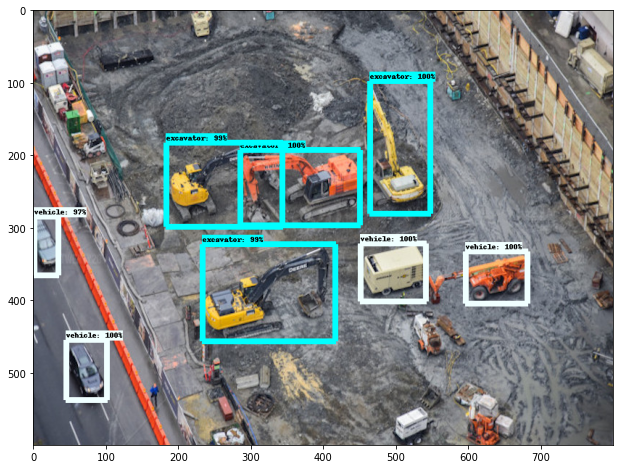

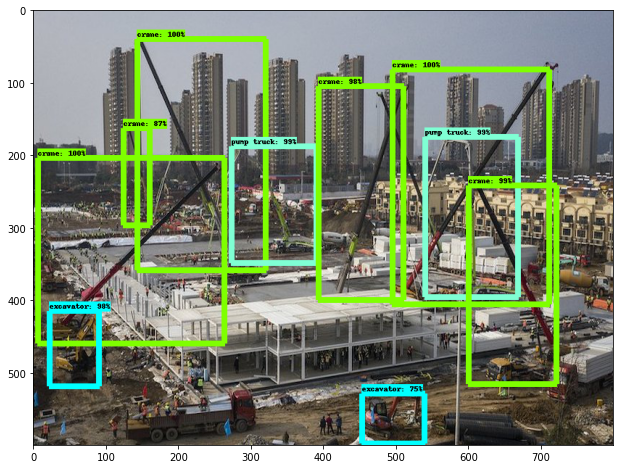

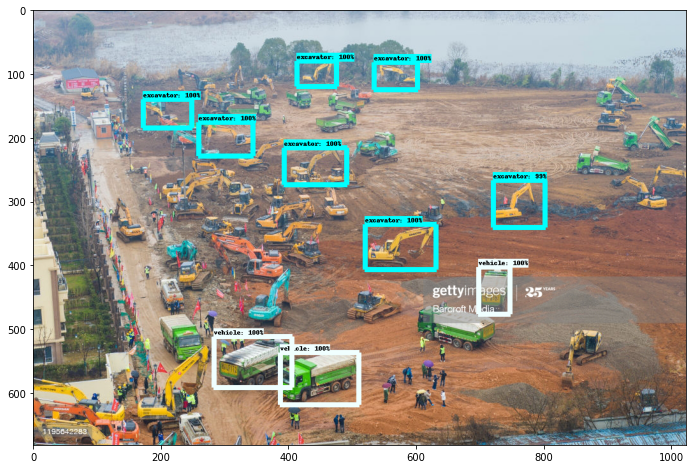

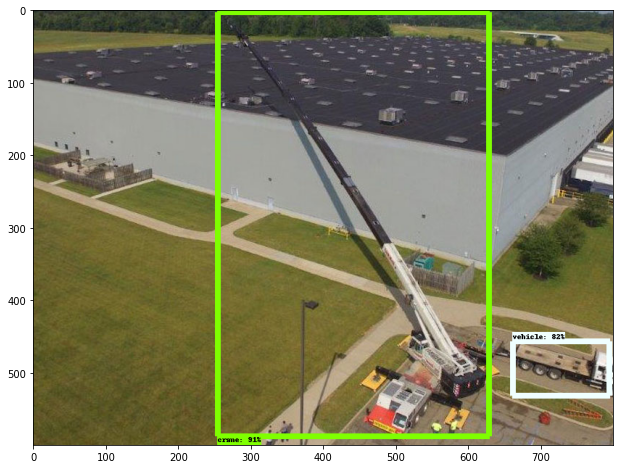

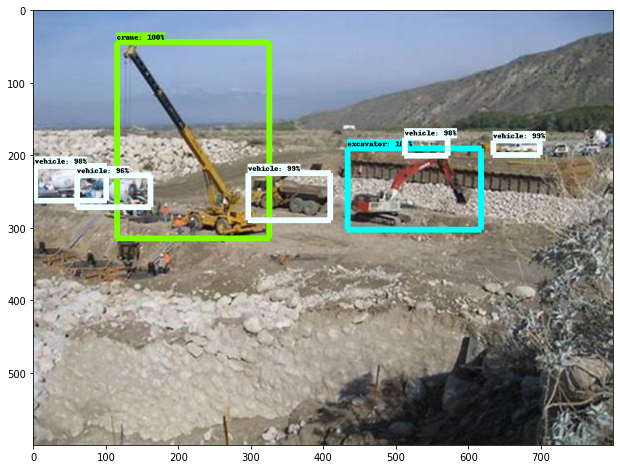

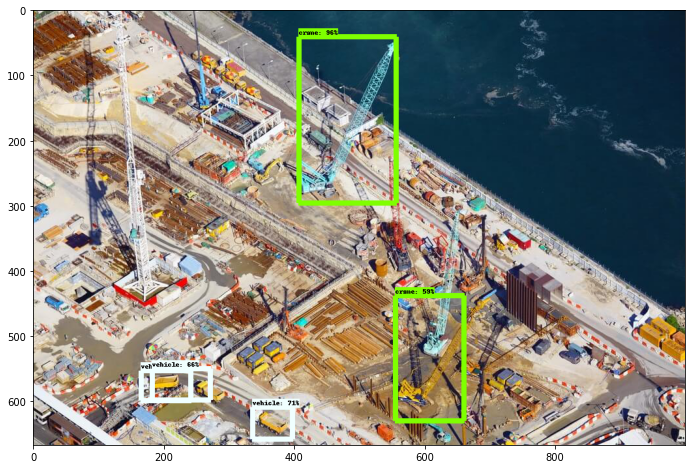

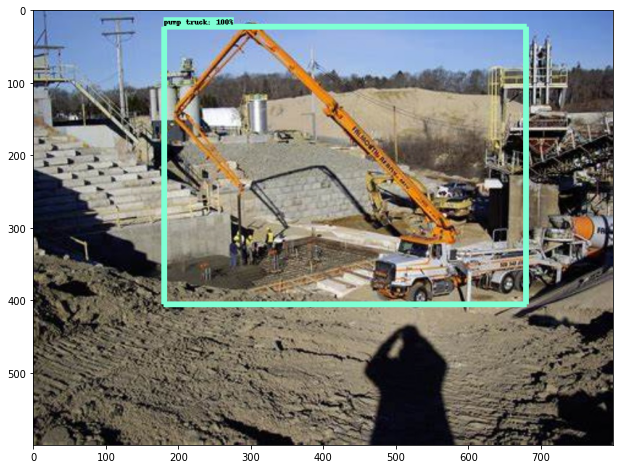

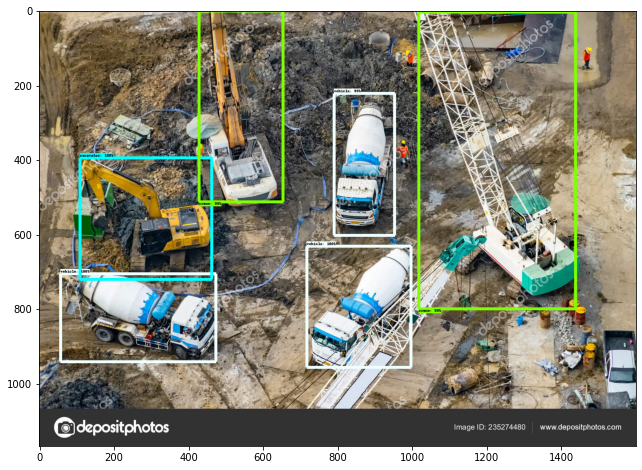

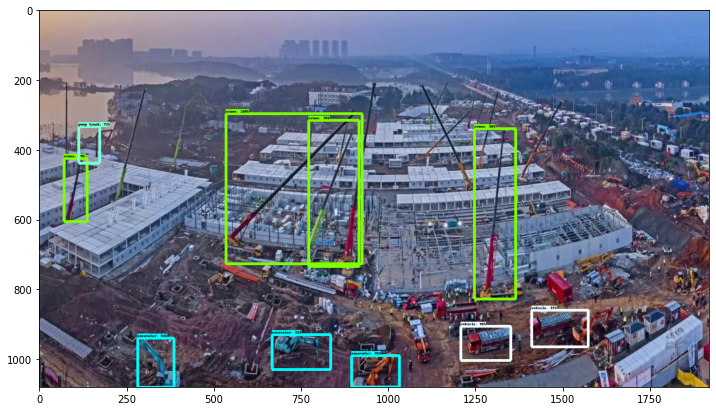

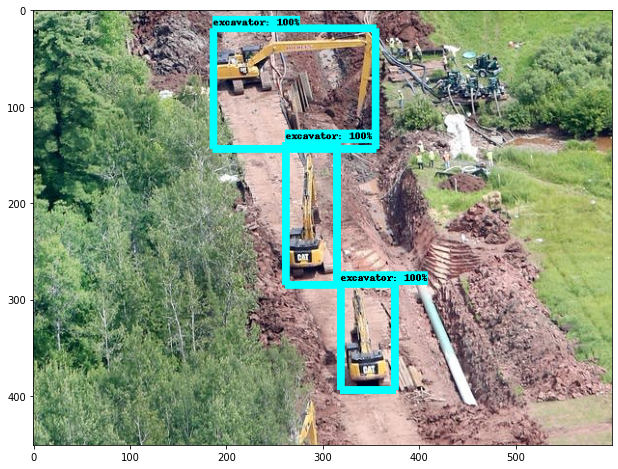

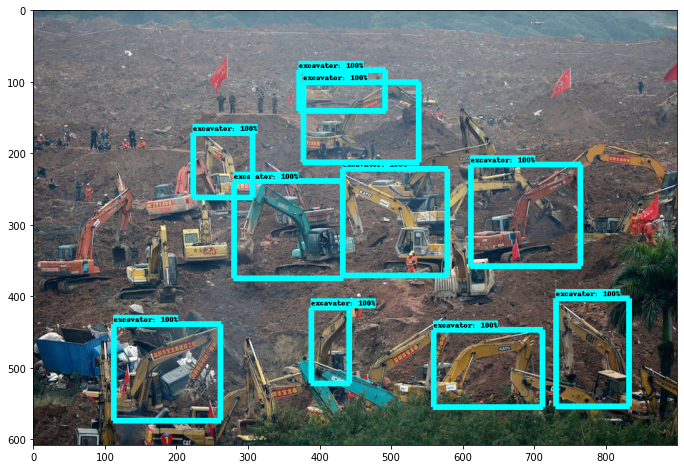

In [32]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

print(PATH_TO_CKPT)
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    print(str(output_dict['num_detections']) + ' num_detections are found')
    print(output_dict['detection_scores'][:10])
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        max_boxes_to_draw=10,
        min_score_thresh=0.4,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)